# Working with Categorical Data in Python

Categorical data—also called **qualitative data**—is foundational to nearly all real-world analysis, from social science surveys to machine learning. Unlike numerical (quantitative) data, categorical variables represent discrete groups, labels, or categories. Understanding how to rigorously represent, summarise, and interpret categorical variables is essential for valid statistics, robust visualisation, and effective modelling.


### What Does It Mean to Be "Categorical"?

**Categorical variables** describe characteristics that can be divided into a **finite number of groups** or levels, known as **categories**. These categories are typically:
- **Fixed and known in advance** (e.g., eye colour, marital status, political affiliation).
- **Qualitative in nature**—they describe *qualities* or *types* rather than magnitudes.

**Examples:**
- Gender: {Male, Female, Other}
- Eye Colour: {Blue, Brown, Green}
- Marital Status: {Single, Married, Divorced, Widowed}
- Country of Birth: {Brazil, UK, USA, ...}

**Numerical variables** (quantitative data), by contrast, express magnitudes—typically as measurements or counts (e.g., height, weight, salary, age).

### Ordinal vs. Nominal Variables

**Nominal variables:**
- Purely categorical—**no natural order** among categories.
- Examples: Eye colour {Blue, Green, Brown}, City names, Blood type.

**Ordinal variables:**
- Categorical with a **meaningful order or ranking** among categories.
- The order matters, but the *interval* between categories is not necessarily consistent or known.
- Examples:
    - Survey responses: {Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree}
    - Education levels: {Primary, Secondary, Tertiary}
    - T-shirt sizes: {Small, Medium, Large, Extra Large}

**Why does this distinction matter?**
- Many statistical methods and visualisations handle ordinal and nominal variables differently.
- Ordinal variables allow for medians, percentiles, and ordered comparisons; nominal variables do not.


### Describing and Summarising Categorical Data

### Using `.describe()`

Pandas’ `.describe()` for object or categorical columns yields basic summaries:

```python
df["category_column"].describe()
```

Typical output:
- **count**: Number of non-missing values.
- **unique**: Number of distinct categories.
- **top**: Most common category (the mode).
- **freq**: Frequency of the most common category.


### Frequency Tables and Proportions

#### Using `.value_counts()`

Get absolute frequencies of each category:

```python
df["category_column"].value_counts()
```

#### Using `.value_counts(normalize=True)`

Get relative frequencies (proportions):

```python
df["category_column"].value_counts(normalize=True)
```
- Proportions sum to 1.0, expressing the percentage of each group.


### Cross-tabulations

Analyse the relationship between two (or more) categorical variables:

```python
pd.crosstab(df["cat1"], df["cat2"])
```
- Produces a contingency table showing counts for each combination of categories.

### Encoding Categorical Data

**For statistical modelling and machine learning, categorical data must often be encoded numerically:**

- **Label encoding:** Assigns each category a unique integer (suitable for ordinal variables).
- **One-hot encoding:** Creates a binary indicator column for each category (suitable for nominal variables).

```python
pd.get_dummies(df["category_column"])
```

For ordinal variables, use Pandas’ `CategoricalDtype` to specify an order:

```python
import pandas as pd

order = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
df["response"] = pd.Categorical(df["response"], categories=order, ordered=True)
```

### Concepts for Categorical Data

- **Mode:** The most frequent category—useful for nominal and ordinal data.
- **Median:** Only meaningful for ordinal variables.
- **Proportions:** Compare category prevalence directly.
- **Entropy / Gini impurity:** Measures of category diversity or inequality—useful for decision trees and information theory.
- **Chi-square test:** Tests for independence between two categorical variables (contingency table analysis).
- **Cramér's V:** Quantifies association strength between two categorical variables.

### Visualisation

- **Bar plots** for absolute/relative frequencies.
- **Pie charts** (with caution) for proportions.
- **Stacked bar charts** for bivariate categorical analysis.
- **Mosaic plots** for multivariate relationships.


### Best Practices 

- Always clearly distinguish between nominal and ordinal variables in your analysis.
- Use `.astype("category")` to explicitly mark columns as categorical—improves memory usage and ensures proper treatment by Pandas and plotting libraries.
- Document the meaning of each category, especially for ordinal variables.
- Carefully inspect for **unexpected, misspelled, or rare categories**, which may indicate data entry errors or outliers.


Working rigorously with categorical data requires clear conceptual distinctions, careful statistical summarisation, and thoughtful encoding. By mastering Pandas’ categorical tools and understanding the statistical rationale, you ensure your analysis captures the structure, diversity, and relationships inherent in qualitative variables—foundations for robust, interpretable, and actionable data science.


In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [126]:
adult = pd.read_csv("data/adult.csv")
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [127]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [128]:
adult["Marital Status"].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object

In [129]:
adult["Marital Status"].value_counts()

Marital Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [130]:
adult["Marital Status"].value_counts(normalize=True).round(4)

Marital Status
Married-civ-spouse       0.4599
Never-married            0.3281
Divorced                 0.1365
Separated                0.0315
Widowed                  0.0305
Married-spouse-absent    0.0128
Married-AF-spouse        0.0007
Name: proportion, dtype: float64

### Exploring a target variable
You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, Above/Below 50k, you decide to explore the variable in more detail.

The Python package pandas will be used throughout this course and will be loaded as pd throughout. The adult census income dataset, `adult`, has also been preloaded for you.

In [131]:
# Explore the Above/Below 50k variable by printing out a description of the variable's contents.
adult["Above/Below 50k"].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object

In [132]:
# Explore the Above/Below 50k variable by printing out a frequency table of the values found in this column.
adult["Above/Below 50k"].value_counts()

Above/Below 50k
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [133]:
# Rerun .value_counts(), but this time print out the relative frequency values instead of the counts.
adult["Above/Below 50k"].value_counts(normalize=True).round(4)

Above/Below 50k
<=50K    0.7592
>50K     0.2408
Name: proportion, dtype: float64

## Categorical Data in Pandas


Pandas offers dedicated support for **categorical data**, which encompasses variables that take on a limited, usually fixed, set of possible values (categories or levels). This is distinct from numerical data and from string data stored with the generic `object` dtype. Using Pandas’ categorical data type brings **significant memory savings**, faster operations, and a more faithful representation of the underlying variable semantics.

This guide outlines how to create, convert, and optimise categorical data in Pandas—using general, schema-agnostic strategies and best practices.


### Recognising Data Types: `object` vs. `category`

- **Object dtype:** By default, columns containing text or mixed types are stored as `object`.
- **Category dtype:** Columns defined as `category` encode their values using integer codes and category labels.

To examine your DataFrame’s column types:

```python
data_frame.dtypes
```


### Converting Columns to Categorical

To convert any existing column to categorical type:

```python
data_frame["variable"] = data_frame["variable"].astype("category")
```

This operation replaces a memory-intensive object column with a more efficient categorical representation. You can check the result:

```python
print(data_frame["variable"].dtype)
# Output: CategoricalDtype(categories=[...], ordered=False)
```

Categories are inferred from unique values in the column. The `ordered` property indicates whether the categories have an inherent order.


### Creating a Categorical Series from Scratch

You can define a categorical series directly, either from a list of values or by specifying both the categories and their order.

**Generic construction:**

```python
import pandas as pd

# Basic categorical (categories discovered automatically)
series = pd.Series(["A", "B", "C", "A"], dtype="category")

# Categorical with explicit categories and order
ordered_series = pd.Categorical(
    ["X", "Y", "X", "Z"],
    categories=["Z", "Y", "X"],
    ordered=True
)
```
This approach is agnostic to specific domain names—useful for any discrete grouping variable.


### Why Use Categorical Dtypes? (Memory & Performance)

Converting string/object columns with repeated values to categorical can save significant memory and speed up group-based operations.

**Example workflow:**

```python
# Examine memory usage before conversion
before = data_frame["variable"].nbytes

# Convert to categorical
data_frame["variable"] = data_frame["variable"].astype("category")

# Examine memory usage after conversion
after = data_frame["variable"].nbytes

print(f"Memory reduced from {before} to {after} bytes")
```

This benefit is maximised in large datasets with many repeated values per column.

### Reading Data as Categorical

You can specify categorical dtypes at the time of data import for efficiency and clarity:

```python
column_types = {"variable": "category"}
data_frame = pd.read_csv("file.csv", dtype=column_types)
```

This ensures columns are efficiently represented from the outset, without requiring a post-import conversion.


### Managing Categories

- **Ordering categories:** For ordinal variables, use `ordered=True` and specify the sequence of categories.
- **Changing categories:** Use `.cat` accessor methods (e.g., `.cat.reorder_categories()`, `.cat.add_categories()`, `.cat.remove_unused_categories()`) for advanced manipulation.
- **Unused categories:** Categorical dtype can store levels not currently present in the data—useful for predefined schemas.


### Best Practices

- Use the categorical dtype for all variables representing a limited set of discrete values (qualitative, group, or label data).
- Specify category order for ordinal data to enable correct sorting and comparisons.
- For very large datasets, always check and convert text columns with few unique values to categorical for both performance and clarity.
- Document the intended categories (and their order) as part of your data schema for reproducibility.


Categorical data types in Pandas provide an efficient, expressive, and semantically correct way to handle qualitative variables. By adopting categorical dtype for all appropriate columns—regardless of domain or dataset—you gain memory efficiency, analytic clarity, and robust handling of qualitative data structures.


In [134]:
adult.dtypes

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object

In [135]:
adult["Marital Status"].dtype

dtype('O')

In [136]:
# Set as categorical
adult["Marital Status"] = adult["Marital Status"].astype("category")

In [137]:
adult["Marital Status"].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False, categories_dtype=object)

In [138]:
my_data = ["A", "A", "C", "B", "C", "A"]
my_series = pd.Categorical(my_data, categories=["C", "B", "A"], ordered=True)
my_series

['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['C' < 'B' < 'A']

In [139]:
# Specify dtypes when reading data
adult_dtypes = {"Marital Status":"category"}
adult = pd.read_csv("data/adult.csv", dtype=adult_dtypes)
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [140]:
import ast

# Read the text file and create a list of occupations

with open("data/list_of_occupations.txt", "r") as file:
    content = file.read().strip()
    # If the file contains a list-like structure, evaluate it safely
    try:
        list_of_occupations = ast.literal_eval(content)
    except:
        # If that fails, try splitting by quotes and filtering
        list_of_occupations = [item.strip().strip("'\"") for item in content.split(',') if item.strip().strip("'\"")]


In [141]:
# Create a pandas Series, series1, using the list_of_occupations (do not set the dtype).
series1 = pd.Series(list_of_occupations)
series1


0       Data Scientist
1         Data Analyst
2       Data Scientist
3         Statistician
4       Data Scientist
             ...      
1866      Data Analyst
1867      Data Analyst
1868    Data Scientist
1869    Data Scientist
1870    Data Scientist
Length: 1871, dtype: object

In [142]:
# Print both the data type and number of bytes used of this new Series.
print(f"series1 data type: {series1.dtype}")
print(f"series1 number of bytes: {series1.nbytes}")


series1 data type: object
series1 number of bytes: 14968


In [143]:
# Create a second pandas Series, series2, using the list_of_occupations and set the dtype to "category".

series2 = pd.Series(list_of_occupations, dtype="category")
series2.head()

0    Data Scientist
1      Data Analyst
2    Data Scientist
3      Statistician
4    Data Scientist
dtype: category
Categories (3, object): ['Data Analyst', 'Data Scientist', 'Statistician']

In [144]:
# Print both the data type and number of bytes used of this new Series.
print(f"series2 data type: {series2.dtype}")
print(f"series2 number of bytes: {series2.nbytes}")

series2 data type: category
series2 number of bytes: 1895


### Creating a categorical pandas Series
Another colleague at work has collected information on the number of "Gold", "Silver", and "Bronze" medals won by the USA at the Summer & Winter Olympics since 1896. She has provided this as a list, `medals_won`. Before taking a look at the total number of each medal won, you want to create a categorical pandas Series. However, you know that these medals have a specific order to them and that Gold is better than Silver, but Silver is better than Bronze. Use the object, `medals_won`, to help.

In [145]:
import ast

# Read the text file and create a list of occupations

with open("data/medals_won.txt", "r") as file:
    content = file.read().strip()
    # If the file contains a list-like structure, evaluate it safely
    try:
        medals_won = ast.literal_eval(content)
    except:
        # If that fails, try splitting by quotes and filtering
        medals_won = [item.strip().strip("'\"") for item in content.split(',') if item.strip().strip("'\"")]


Create a categorical pandas Series without using `pd.Series()`.
Specify the three known medal categories such that `"Bronze" < "Silver" < "Gold"`.


In [146]:
medals = pd.Categorical(medals_won, categories=["Bronze", "Silver", "Gold"], ordered=True)
print(medals)
print(medals.dtype)

['Silver', 'Silver', 'Bronze', 'Silver', 'Gold', ..., 'Gold', 'Bronze', 'Silver', 'Gold', 'Gold']
Length: 2828
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']
category


### Setting dtype when reading data
You are preparing to create a machine learning model to predict a person's income category using the adult census income dataset. You don't have access to any cloud resources and you want to make sure that your laptop will be able to load the full dataset and process its contents. You have read in the first five rows of the dataset `adult` to help you understand what kind of columns are available.

#### Question
Based on the data types in adult, which columns are good candidates for specifying a dtype of "category" when reading in the adult dataset?

**Possible answers**:

1) "Age", "Education Num", and "Nationality"

2) "Age", "Hours/Week", and "Capital Loss"

3) "Workclass", "Education Num", "Hours/Week", and "Above/Below 50k"

4) "Workclass", "Education", "Relationship", "Above/Below 50k"

In [147]:
adult.dtypes

Age                   int64
Workclass            object
fnlgwt                int64
Education            object
Education Num         int64
Marital Status     category
Occupation           object
Relationship         object
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k      object
dtype: object

Create a dictionary with keys: `"Workclass"`, `"Education"`, `"Relationship"`, and `"Above/Below 50k"`.<br>
Set the value for each key to be `"category"`.

In [148]:
adult_dtypes = {"Workclass": "category", "Education": "category", "Relationship":"category", "Above/Below 50k": "category"}

In [149]:
# Use the newly created dictionary, adult_dtypes, when reading in adult.csv
adult2 = pd.read_csv("data/adult.csv", dtype=adult_dtypes)
adult2.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Grouping Data by Category in Pandas

Grouping data is a fundamental operation in data analysis, enabling the computation of aggregate statistics and summaries within meaningful subsets. The Pandas `.groupby()` method provides a powerful, flexible, and efficient way to split data into groups, apply functions, and combine the results. This process—*split, apply, combine*—is central to both exploratory data analysis and data wrangling.

This guide presents the principles, strategies, and best practices for grouping data by categorical variables in a fully general, schema-agnostic manner.


### The Basics: Splitting Data with `.groupby()`

The `.groupby()` operation partitions your DataFrame into distinct groups based on the unique values of one or more columns (often categorical). All subsequent computations (such as means, sums, counts, or custom functions) are performed **within each group**.

**Syntax:**

```python
grouped_object = data_frame.groupby(by="category_column")
```
- You can also group by a list of columns for hierarchical grouping:

```python
grouped_object = data_frame.groupby(by=["category1", "category2"])
```


### Applying Aggregate Functions

Once the data is grouped, apply aggregate functions to summarise the data within each group. This can be done in a chain or stored in an intermediate variable.

**Common aggregate functions:**
- `.mean()` – arithmetic mean of each group
- `.sum()` – total of each group
- `.size()` – number of items in each group
- `.count()` – number of non-missing items in each group
- `.median()`, `.min()`, `.max()`, `.std()`, `.var()` – standard statistics

**Example:**

```python
# Compute the mean of all numeric columns, grouped by a categorical variable
grouped_object = data_frame.groupby(by="category_column")
means = grouped_object.mean()
```

**One-liner:**

```python
data_frame.groupby("category_column").mean()
```


### Specifying Columns for Aggregation

- To aggregate only specific columns, subset them before calling the aggregate function:

```python
# Only computes the sum for selected columns
data_frame.groupby("category_column")[["numeric_col1", "numeric_col2"]].sum()
```

- Alternatively, aggregate all numeric columns, then subset the result:

```python
# Aggregates all, then selects
summary = data_frame.groupby("category_column").sum()[["numeric_col1", "numeric_col2"]]
```

- **Preferred**: Specify columns **before** aggregation, especially with large DataFrames, for efficiency.


### Grouping by Multiple Columns

Pandas allows grouping by more than one column to create higher-dimensional groupings.

```python
grouped_object = data_frame.groupby(["category1", "category2"])
result = grouped_object.size()
```
- The result is a Series or DataFrame with a **MultiIndex** (hierarchical index), reflecting the combination of group keys.


### Aggregate with Custom Functions

Any function (built-in or custom) can be applied to grouped data via `.agg()`:

```python
# Apply multiple functions to one or more columns
grouped_object.agg({"numeric_col": ["mean", "sum", "std"]})
```

- `.agg()` accepts dictionaries, lists of functions, or even lambda expressions for flexible summaries.


### Output Types

- Aggregating a **single column** produces a Series indexed by the group key(s).
- Aggregating **multiple columns** yields a DataFrame with group key(s) as the index.


### Best Practices

- Always examine the output structure (`.head()`, `.info()`, `.index`) to ensure the result matches your expectations.
- Use descriptive, meaningful column names when renaming aggregations, especially for downstream reporting.
- For large datasets or complex grouping, consider `.groupby().agg()` for efficiency and flexibility.
- Reset the index (`.reset_index()`) if you prefer a flat DataFrame rather than a grouped index after aggregation.

- Grouped summaries allow direct comparison of distributions, central tendencies, and variability **between categories or subgroups**.
- Enables fast exploratory analysis of relationships, trends, or disparities across different segments of the data.
- Critical for feature engineering, data validation, and preparing data for further modelling.

Grouping and aggregating by category is a core capability in Pandas, unlocking efficient, expressive, and semantically powerful ways to summarise, explore, and understand your data. By mastering `.groupby()`, you can produce accurate and insightful statistics for any categorical structure—regardless of variable names or context.


In [150]:
groupby_object = adult.groupby(by=["Above/Below 50k"]).mean(numeric_only=True).round(4)
groupby_object

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
Above/Below 50k,,,,,,
<=50K,36.7837,190340.8652,9.5951,148.7525,53.1429,38.8402
>50K,44.2498,188005.0000,11.6117,4006.1425,195.0015,45.4730


In [151]:
# Specifying columns
adult.groupby(by=["Above/Below 50k"])[["Age", "Education Num"]].sum()

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


In [152]:
print(adult.groupby(by=["Above/Below 50k", "Marital Status"], observed=True).size())


Above/Below 50k  Marital Status       
<=50K            Divorced                  3980
                 Married-AF-spouse           13
                 Married-civ-spouse        8284
                 Married-spouse-absent      384
                 Never-married            10192
                 Separated                  959
                 Widowed                    908
>50K             Divorced                   463
                 Married-AF-spouse           10
                 Married-civ-spouse        6692
                 Married-spouse-absent       34
                 Never-married              491
                 Separated                   66
                 Widowed                     85
dtype: int64


### Create lots of groups
You want to find the mean Age of adults when grouping by the following categories:

- `"Workclass"` (which has 9 categories)
- `"Above/Below 50k"` (which has 2 categories)
- `"Education"` (which has 16 categories).
You have developed the following bit of code:
```python
gb = adult.groupby(by=[ "Workclass",
                        "Above/Below 50k", 
                        "Education"])
```
How many groups are in the gb object and what is the maximum possible number of groups that could have been created? The dataset adult, and the gb object have been preloaded for you.

In [153]:
gb = adult.groupby(by=["Workclass", "Above/Below 50k", "Education"])["Age"].mean()
gb


Workclass    Above/Below 50k  Education   
?            <=50K            10th            33.357143
                              11th            32.372881
                              12th            30.736842
                              1st-4th         63.833333
                              5th-6th         53.642857
                                                ...    
State-gov    >50K             Some-college    44.322581
Without-pay  <=50K            7th-8th         65.000000
                              Assoc-acdm      62.000000
                              HS-grad         42.555556
                              Some-college    53.000000
Name: Age, Length: 208, dtype: float64

In [154]:
# Split the adult dataset across the "Sex" and "Above/Below 50k" columns, saving this object as gb.
gb = adult.groupby(by=["Sex", "Above/Below 50k"])

# Print out the number of observations found in each group.
print(gb.size())

# Using gb, find the average of each numerical column.
display(gb.mean(numeric_only=True))


Sex     Above/Below 50k
Female  <=50K               9592
        >50K                1179
Male    <=50K              15128
        >50K                6662
dtype: int64


Age         fnlgwt  Education Num  Capital Gain  \
Sex    Above/Below 50k                                                          
Female <=50K            36.210801  185999.381359       9.820475    121.986134   
       >50K             42.125530  183687.406277      11.787108   4200.389313   
Male   <=50K            37.147012  193093.609268       9.452142    165.723823   
       >50K             44.625788  188769.101321      11.580606   3971.765836   

                        Capital Loss  Hours/Week  
Sex    Above/Below 50k                            
Female <=50K               47.364470   35.916701  
       >50K               173.648855   40.426633  
Male   <=50K               56.806782   40.693879  
       >50K               198.780396   46.366106

### Using pandas functions effectively
You are creating a Python application that will calculate summary statistics based on user-selected variables. The complete dataset is quite large. For now, you are setting up your code using part of the dataset, preloaded as `adult`. As you create a reusable process, make sure you are thinking through the most efficient way to setup the `GroupBy` object.

In [155]:
# Create a list of the names for two user-selected variables: "Education" and "Above/Below 50k".
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object, gb, using the user_list as the grouping variables.
gb = adult.groupby(by=user_list)

# Calculate the mean of "Hours/Week" across each group using the most efficient approach covered in the video.
display(gb["Hours/Week"].mean(numeric_only=True).round(4))

Education     Above/Below 50k
10th          <=50K              36.5741
              >50K               43.7742
11th          <=50K              33.3229
              >50K               45.1333
12th          <=50K              35.0350
              >50K               44.8182
1st-4th       <=50K              37.8642
              >50K               48.8333
5th-6th       <=50K              38.5394
              >50K               46.0000
7th-8th       <=50K              38.8300
              >50K               47.5000
9th           <=50K              37.6674
              >50K               44.8519
Assoc-acdm    <=50K              39.2643
              >50K               44.2566
Assoc-voc     <=50K              40.8178
              >50K               43.8532
Bachelors     <=50K              40.5862
              >50K               45.4755
Doctorate     <=50K              45.4299
              >50K               47.5131
HS-grad       <=50K              39.7275
              >50K         

## Setting Category Variables in Pandas


For categorical variables, precise control over the categories, their order, and their presence in your data is essential for analysis, statistics, and modelling. Pandas provides robust methods for managing categorical data via the `.cat` accessor, allowing for category assignment, ordering, addition, and removal—all agnostic to specific dataset themes.

This guide details the full workflow for configuring and optimising categorical variables in Pandas, emphasising abstract principles and flexible usage patterns.



### Assigning Categorical Type

Convert any string or integer column to categorical for efficiency and semantic clarity:

```python
data_frame["variable"] = data_frame["variable"].astype("category")
```

Check current categories:
```python
print(data_frame["variable"].cat.categories)
```

### Setting Categories Explicitly

You can redefine the set of valid categories using `.cat.set_categories()`. This is critical for:

- Establishing the **set of allowed categories** (including categories not currently present in the data).
- Setting or enforcing a **custom order** for categories (for ordinal data or ordered plots).

```python
data_frame["variable"] = data_frame["variable"].cat.set_categories(
    new_categories=["cat_a", "cat_b", "cat_c"],
    ordered=True   # or False for nominal data
)
```

- Any value not listed in `new_categories` will be set to `NaN`.
- The `ordered` parameter determines whether the categories are treated as ordinal.


### Adding Categories

You may add new, possibly unrepresented, categories using `.cat.add_categories()`—useful when categories are possible but not observed in the current data.

```python
data_frame["variable"] = data_frame["variable"].cat.add_categories(
    new_categories=["cat_x", "cat_y"]
)
```

- This expands the list of valid categories but does not alter existing data.
- Newly added categories will have a count of zero unless assigned.

### Removing Categories

To restrict valid values and clean up unused or irrelevant categories, use `.cat.remove_categories()`:

```python
data_frame["variable"] = data_frame["variable"].cat.remove_categories(
    removals=["cat_b", "cat_x"]
)
```
- Any value matching a removed category is set to `NaN`.
- The category list shrinks, improving semantic precision.


### Handling Missing Values

If the categorical column contains values not listed among categories, or after removing a category, those entries are set to `NaN`. In practice, `NaN` in a categorical variable may mean:

- The value is genuinely unknown.
- The observation does not fit any current category.
- Data was recoded or filtered in a way that excluded the category.

Check frequencies and missingness:
```python
data_frame["variable"].value_counts(dropna=False)
```

### Category Management Methods

- **Setting categories and order:**  
  `cat.set_categories(new_categories=[...], ordered=...)`
    - Can reorder and restrict to a defined set, removing all others.
- **Adding categories:**  
  `cat.add_categories(new_categories=[...])`
    - Expands the possible category set; existing data unchanged.
- **Removing categories:**  
  `cat.remove_categories(removals=[...])`
    - Sets matching data to `NaN` and removes from category list.

All methods can be used in-place (with `inplace=True`) or assigned to a new variable.

### Best Practices

- Always explicitly set category order for ordinal variables—this controls comparison, sorting, and ordered visualisation.
- Define all possible categories in advance for survey data, rating scales, or enumerated types, even if some categories are absent in the current sample.
- Regularly clean up unused or irrelevant categories for clarity and performance.
- Treat `NaN` thoughtfully, documenting whether it means missing, not applicable, or recoded.

<br>

Fine-grained management of categorical variables in Pandas ensures analytical accuracy, memory efficiency, and precise data semantics. By leveraging `.cat` methods to set, add, and remove categories and control ordering, you build robust, interpretable pipelines for any categorical data structure—regardless of specific variable names or dataset context.


In [156]:
dogs = pd.read_csv("data/ShelterDogs.csv")

### Adding categories
The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". You are setting up a pipeline to do some analysis and want to look into what information is available regarding the `"keep_in"` variable.

In [157]:
# Check frequency counts while also printing the NaN count
dogs["keep_in"].value_counts(dropna=False)

keep_in
both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: count, dtype: int64

In [158]:
# Convert the "keep_in" variable to a categorical Series.
dogs["keep_in"] = dogs["keep_in"].astype("category")

In [159]:
# Add the list of new categories provided by the adoption agency, new_categories, to the "keep_in" column.
# new_categories = ["Unknown History", "Open Yard (Countryside)"]
# dogs["keep_in"] = dogs["keep_in"].cat.add_categories(
#     new_categories = new_categories
# )

# Check frequency counts one more time
dogs["keep_in"].value_counts(dropna=False)

keep_in
both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: count, dtype: int64

In [160]:
# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Set "likes_children" to category type
dogs["likes_children"] = dogs["likes_children"].astype("category")

# Print out categories
print(dogs["likes_children"].cat.categories)

# # Remove the `"maybe" category
# dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
# print(dogs["likes_children"].value_counts())


Index(['no', 'yes'], dtype='object')


## Updating Categories in Pandas Categorical Data

Categorical variables often require updates: categories may need renaming, collapsing (combining several categories into one), or systematic changes to naming conventions. Pandas provides flexible, robust tools for manipulating the category levels of a categorical Series or DataFrame column, supporting high-quality, schema-agnostic data cleaning and preparation workflows.

This guide covers all key methods for updating, renaming, and collapsing categories—focusing on abstract principles, not domain-specific examples.

### Renaming Categories

Use the `.cat.rename_categories()` method to update category names in a categorical Series.  
This is useful for:

- Correcting typos or inconsistencies.
- Adopting standard naming conventions.
- Making labels more concise or readable.

### Renaming with a Dictionary

Pass a dictionary mapping old category names to new ones:

```python
# Rename categories according to a mapping
category_mapping = {"old_name_a": "new_name_a", "old_name_b": "new_name_b"}
data_frame["variable"] = data_frame["variable"].cat.rename_categories(category_mapping)
```

**Best Practices:**
- All category names not listed in the dictionary remain unchanged.
- All new names **must be unique**—you cannot collapse multiple categories into the same label using `rename_categories`.
- If a new name already exists in the list of categories, it cannot be duplicated in the result.

### Renaming with a Function

Apply a function to each category (e.g., title case, lower case):

```python
data_frame["variable"] = data_frame["variable"].cat.rename_categories(lambda c: c.capitalize())
```
This allows for systematic, scalable updates to category naming conventions.


### Collapsing Categories

To merge or **collapse several categories into a single label** (e.g., grouping similar types), use the `.replace()` method first, then convert back to categorical:

#### Steps:

1. **Create a mapping for category collapsing:**

```python
collapse_mapping = {
    "cat_a": "new_cat",
    "cat_b": "new_cat",
    # Any other categories to collapse...
}
```

2. **Replace values in the Series:**

```python
data_frame["new_variable"] = data_frame["variable"].replace(collapse_mapping)
```

3. **Convert the result back to categorical for memory and efficiency:**

```python
data_frame["new_variable"] = data_frame["new_variable"].astype("category")
```

**Why not use `rename_categories()` for collapsing?**  
`rename_categories()` requires all new names to be unique—collapsing multiple categories into one creates duplicate labels, which is not allowed.


### Common Mistakes

- **Uniqueness constraint:**  
  `rename_categories()` cannot create duplicate category labels; for merging categories, use `.replace()` as shown.
- **Temporary type changes:**  
  When collapsing categories, the Series may temporarily become `object` dtype after `.replace()`—convert it back to categorical immediately.
- **Renaming missing categories:**  
  If you attempt to rename a category that does not exist, Pandas will raise an error—always confirm categories first using `.cat.categories`.
- **Adding or removing categories:**  
  Use `.cat.add_categories()` and `.cat.remove_categories()` to manage the valid set of category labels as needed.


### Recap: Methods for Updating Categories

- **Renaming (no collapsing):**  
  `.cat.rename_categories(mapping_dict)` or `.cat.rename_categories(function)`
- **Collapsing (merging categories):**  
  `.replace(collapse_mapping)` followed by `.astype("category")`
- **Systematic renaming:**  
  Use string methods, lambdas, or custom functions for uniform formatting.
- **Managing set of categories:**  
  Add new categories with `.cat.add_categories()`, remove with `.cat.remove_categories()`.


### Rationale

- Consistent, concise, and semantically meaningful category names are essential for interpretable visualisation, tabulation, and modelling.
- Collapsing categories can reduce noise and increase sample size per group, improving statistical power and stability.
- All category modifications should be well-documented for reproducibility and transparency.


Updating categories in Pandas requires a clear strategy: use `.cat.rename_categories()` for one-to-one renaming, `.replace()` for many-to-one collapsing, and always ensure the categorical dtype is preserved for efficiency and semantic integrity. Mastery of these techniques enables robust, scalable, and interpretable categorical data workflows across any domain.


In [161]:
dogs["breed"] = dogs["breed"].astype("category")
dogs["breed"].value_counts()

breed
Unknown Mix                        1524
German Shepherd Dog Mix             190
Dachshund Mix                       147
Labrador Retriever Mix               83
Staffordshire Terrier Mix            62
                                   ... 
Vizsla, Whippet Mix                   1
Akita, German Shepherd Dog Mix        1
West Highland White Terrier Mix       1
Akita                                 1
Yorkshire Terrier                     1
Name: count, Length: 277, dtype: int64

In [162]:
my_changes = {"Unknown Mix":"Unknown"}
dogs["breed"] = dogs["breed"].cat.rename_categories(my_changes)

In [163]:
dogs["breed"].value_counts()

breed
Unknown                            1524
German Shepherd Dog Mix             190
Dachshund Mix                       147
Labrador Retriever Mix               83
Staffordshire Terrier Mix            62
                                   ... 
Vizsla, Whippet Mix                   1
Akita, German Shepherd Dog Mix        1
West Highland White Terrier Mix       1
Akita                                 1
Yorkshire Terrier                     1
Name: count, Length: 277, dtype: int64

In [164]:
dogs["sex"] = dogs["sex"].astype("category").cat.rename_categories(lambda c: c.title())
dogs["sex"].value_counts()

sex
Male      1681
Female    1256
Name: count, dtype: int64

In [165]:
dogs["color"] = dogs["color"].astype("category")
dogs["color"].cat.categories

Index(['apricot', 'black', 'black and brown', 'black and tan',
       'black and white', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')

In [166]:
# Create mapping to collapse multiple "black" variants into one category
update_colors = {
    "black and brown": "black", 
    "black and tan" : "black",
    "black and white" : "black",
}

# Convert to string, apply replace, then convert back to category
dogs["main_color"] = (dogs["color"]
                      .astype("object")
                      .replace(update_colors)
                      .astype("category")
)

dogs["main_color"].value_counts()

main_color
black              1252
brown               293
yellow-brown        212
apricot             142
brown and white     124
white               124
sable               118
tricolor             99
saddle back          91
striped              89
gray                 64
yellow               63
golden               61
red                  53
spotty               47
gray and white       35
gray and black       28
wild boar            18
red and white        14
dotted               10
Name: count, dtype: int64

### Renaming categories
The `likes_children` column of the adoptable dogs dataset needs an update. Here are the current frequency counts:

In [167]:
dogs["likes_children"] = dogs["likes_children"].cat.add_categories(["Maybe?"])
dogs["likes_children"] = dogs["likes_children"].fillna("Maybe?")
dogs["likes_children"].value_counts()

likes_children
Maybe?    1718
yes       1172
no          47
Name: count, dtype: int64

Two things that stick out are the differences in capitalization and the `?` found in the `Maybe?` category. The data should be cleaner than this and you are being asked to make a few changes.

In [168]:
# Create a dictionary called my_changes that will update the Maybe? category to Maybe.
my_changes = {"Maybe?":"Maybe"}

# Rename the categories in likes_children using the my_changes dictionary.
dogs["likes_children"] = dogs["likes_children"].astype("object").replace(my_changes).astype("category")

# Update the categories one more time so that all categories are uppercase using the .upper() method.
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(lambda c:c.upper())

# Print out the categories of the updated likes_children Series.
print(dogs["likes_children"].cat.categories)


Index(['MAYBE', 'NO', 'YES'], dtype='object')


### Collapsing categories
One problem that users of a local dog adoption website have voiced is that there are too many options. As they look through the different types of dogs, they are getting lost in the overwhelming amount of choice. To simplify some of the data, you are going through each column and collapsing data if appropriate. To preserve the original data, you are going to make new updated columns in the `dogs` dataset. You will start with the `coat` column. The frequency table is listed here:

| Coat Type | Count |
|-----------|-------|
| short | 1969 |
| medium | 565 |
| wirehaired | 220 |
| long | 180 |
| medium-long | 3 |

In [169]:
# Create a dictionary named update_coats to map both wirehaired and medium-long to medium.
update_coats = {"wirehaired":"medium", "medium-long":"medium"}

# Collapse the categories listed in this new dictionary and save this as a new column, coat_collapsed.
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

coat_collapsed
short     1972
medium     785
long       180
Name: count, dtype: int64


## Reordering Categories in Pandas

In categorical data analysis, the order of categories often matters for both **statistical meaning** and **presentation**. Reordering categories is fundamental when defining ordinal variables (e.g., satisfaction ratings), ensuring logical ordering in plots or reports, or optimising grouping and summarisation operations. Pandas provides explicit tools for reordering category levels and specifying whether they are to be treated as *ordered* or *nominal*.

### Why Reorder Categories?

1. **Defining Ordinal Variables:**  
   Some categorical variables have a natural order (e.g., "low", "medium", "high"), but are not numeric. Explicitly ordering these categories enables correct sorting, comparison, and modelling.
2. **Controlling Output Display:**  
   Ordered categories determine the sequence in which results appear in tables, charts, or summaries—crucial for readable, interpretable outputs.
3. **Analytical Consistency:**  
   Certain analyses and statistical methods require the order to be defined (e.g., median calculation, trend plots).
4. **Memory and Performance:**  
   Categorical ordering can optimise internal storage and computation, especially when category levels are defined precisely and unused categories are removed.


### Reordering Categories: Syntax and Strategy

To change the order of categories and set ordinal status, use `.cat.reorder_categories()`:

```python
data_frame["categorical_var"] = data_frame["categorical_var"].cat.reorder_categories(
    new_categories=["level1", "level2", "level3"],
    ordered=True  # or False for nominal data
)
```

- `new_categories` must contain all existing (or allowed) categories, in the desired sequence.
- `ordered=True` signals that the variable should be treated as ordinal.

**In-place Reordering:**

```python
data_frame["categorical_var"].cat.reorder_categories(
    new_categories=["level1", "level2", "level3"],
    ordered=True,
    inplace=True
)
```
- When `inplace=True`, the operation modifies the Series directly.

### Grouping and Summarisation: Effect of Category Order

- When `ordered=True`, groupby results, plots, and sorting will reflect the specified order.
- When `ordered=False` (nominal), category order is ignored for analysis, and outputs may be in lexicographical or arbitrary order.

**Example Analysis:**
```python
# Ordered grouping (ordered=True)
grouped_summary = data_frame.groupby("categorical_var")["numeric_var"].mean()
```
- With ordered categories, group summaries, plots, and crosstabs follow the defined order.

**Without ordering:**
```python
# Nominal grouping (ordered=False)
grouped_summary = data_frame.groupby("categorical_var")["numeric_var"].mean()
```
- The display order is not controlled, and may be arbitrary.


### Best Practices and Notes

- **Always define the logical order** for ordinal variables immediately after creation or import.
- **Remove unused categories** after reordering to optimise storage and avoid confusion.
- **Explicitly set `ordered=False`** for nominal variables, preventing accidental ordered analyses.
- **Check category order** using `.cat.categories` and `.cat.ordered` to confirm the variable’s configuration.
- Use descriptive, meaningful category labels to improve interpretability in outputs and documentation.


### Analytical Rationale

- Ordinal categories enable correct computation of medians, percentiles, and trend detection.
- Ensuring the display order matches the analytical logic reduces risk of misinterpretation in reports and plots.
- Explicit ordering is vital for reproducible research, as output and model interpretation depend on it.
<br>

Reordering categories in Pandas is essential for both statistical correctness and practical clarity. By using `.cat.reorder_categories()`, analysts can control not just the appearance, but the **analytical semantics** of categorical variables—ensuring robust, reproducible, and meaningful data science workflows.


In [170]:
dogs["coat"] = dogs["coat"].astype("category").cat.reorder_categories(
    new_categories = ["short", "medium", "wirehaired", "long"],
    ordered=True
)


In [171]:
dogs.groupby(["coat"], observed=True)["age"].mean()

coat
short         8.364746
medium        9.027982
wirehaired    8.424136
long          9.552056
Name: age, dtype: float64

In [172]:
dogs["coat"] = dogs["coat"].cat.reorder_categories(
    new_categories=["short", "medium", "long", "wirehaired"],
    ordered=False
)

In [173]:
dogs.groupby("coat", observed=True)["age"].mean()

coat
short         8.364746
medium        9.027982
long          9.552056
wirehaired    8.424136
Name: age, dtype: float64

### Reordering categories in a Series
The owner of a local dog adoption agency has asked you take a look at her data on adoptable dogs. She is specifically interested in the size of the dogs in her dataset and wants to know if there are differences in other variables, given a dog's size. The adoptable dogs dataset has been loaded as `dogs` and the `"size"` variable has already been saved as a categorical column.

In [174]:
dogs["size"] = dogs["size"].astype("category")

# Print out the current categories of the size variable
print(dogs["size"].cat.categories)


Index(['large', 'medium', 'small'], dtype='object')


In [175]:
# Reorder categories in the "size" column using the categories "small", "medium", "large", do not set the ordered parameter.
dogs["size"] = dogs["size"].cat.reorder_categories(
    new_categories = ["small", "medium", "large"]
)

In [176]:
# Update the reorder_categories() method so that pandas knows the variable has a natural order.
dogs["size"] = dogs["size"].cat.reorder_categories(
    new_categories = ["small", "medium", "large"],
    ordered=True
)

### Using `.groupby()` after reordering
It is now time to run some analyses on the adoptable dogs dataset that is focused on the `"size"` of the dog. You have already developed some code to reorder the categories. In this exercise, you will develop two similar `.groupby()` statements to help better understand the effect of `"size"` on other variables. dogs has been preloaded for you.

In [177]:
# Print out the frequency table of "sex" for each category of the "size" column.
dogs.groupby("size", observed=True)["sex"].value_counts()

size    sex   
small   Male       260
        Female     214
medium  Male      1090
        Female     854
large   Male       331
        Female     188
Name: count, dtype: int64

In [178]:
# Print out the frequency table of "keep_in" for each category of the "size" column.
dogs.groupby("size", observed=True)["keep_in"].value_counts()

size    keep_in             
small   both flat and garden    238
        flat                     80
        garden                   21
medium  both flat and garden    795
        garden                  317
        flat                     97
large   both flat and garden    191
        garden                  172
        flat                      5
Name: count, dtype: int64

## Cleaning and Accessing Categorical Data in Pandas


Categorical data, while powerful and memory-efficient, is prone to inconsistencies and quality issues arising from data entry errors, formatting inconsistencies, and misapplied types. Robust data cleaning and access methods are essential for ensuring reliable analysis and modelling. This section covers rigorous strategies for identifying, correcting, and accessing categorical data, using agnostic methods applicable to any dataset.


### Common Issues with Categorical Data

1. **Inconsistent Values:**  
   - Variations in case ("Yes" vs "yes"), whitespace (" Value " vs "Value"), or mixed representations.
2. **Misspellings and Typos:**  
   - Variants such as "Noo" instead of "No" create duplicate, misleading categories.
3. **Incorrect Dtype:**  
   - Data intended as categorical may be stored as `object` dtype, losing efficiency and analytic clarity.


### Identifying Issues

Use the following to inspect categorical variables:

- **View all categories:**
  ```python
  data_frame["categorical_var"].cat.categories
  ```

- **Frequency counts (including `NaN`):**
  ```python
  data_frame["categorical_var"].value_counts(dropna=False)
  ```
  - Reveals duplicate or rare categories due to inconsistencies.


### Fixing Whitespace Issues

Leading/trailing whitespace is a common problem. Use `.str.strip()` to remove it:

```python
data_frame["categorical_var"] = data_frame["categorical_var"].str.strip()
```
- Removes spaces before and after category values, merging otherwise-duplicated entries.


### Standardising Capitalization

Differences in capitalisation may fragment categories. Use string methods to standardise:

```python
data_frame["categorical_var"] = data_frame["categorical_var"].str.title()   # "no" → "No"
# or
data_frame["categorical_var"] = data_frame["categorical_var"].str.upper()
# or
data_frame["categorical_var"] = data_frame["categorical_var"].str.lower()
```

Choose the style appropriate for your analysis or domain convention.


### Correcting Misspelled Categories

Use `.replace()` with a mapping dictionary to correct typos or unify equivalent categories:

```python
corrections = {"Typoo": "Typo", "Yess": "Yes"}
data_frame["categorical_var"].replace(corrections, inplace=True)
```
- Ensures consistency and improves data quality.


### Ensuring Proper Data Type

After cleaning, confirm that the variable is of categorical dtype:

```python
print(data_frame["categorical_var"].dtype)
```
- If it is not `category`, convert it:
  ```python
  data_frame["categorical_var"] = data_frame["categorical_var"].astype("category")
  ```


### Accessing Categorical Data

#### Using the `.str` Accessor

- **Search for substrings:**
  ```python
  mask = data_frame["categorical_var"].str.contains("pattern", regex=False)
  filtered = data_frame[mask]
  ```
  - Enables pattern matching and targeted filtering.

#### Using `.loc` for Conditional Access

- **Subset rows by category value:**
  ```python
  result = data_frame.loc[data_frame["categorical_var"] == "Target", "other_column"]
  ```
- **Summarise by group:**
  ```python
  data_frame.loc[data_frame["categorical_var"] == "Target", "other_column"].value_counts()
  ```


### Best Practices

- **Always inspect and clean categorical data before analysis.**
- **Consolidate categories** through consistent capitalisation, whitespace trimming, and typo correction.
- **Convert cleaned columns to categorical dtype** for memory efficiency and clarity.
- **Validate results** with frequency tables after each cleaning step.
- **Document cleaning decisions** to ensure reproducibility and transparency.

<br>

Reliable analysis of categorical data requires systematic cleaning and consistent access patterns. By employing Pandas’ string methods, replacement strategies, and dtype management—along with disciplined data inspection—you can ensure categorical variables are tidy, interpretable, and fully optimised for analysis, regardless of the dataset’s domain or context.


In [179]:
target_counts = {"No": 2503, "yes": 275, "no": 156, "Noo": 2, " NO": 1}

# Build the column as an ndarray of the correct length
target_column = np.repeat(
    list(target_counts.keys()),      # the labels
    list(target_counts.values())     # repeat each label this many times
)

dogs = dogs.iloc[: len(target_column)].copy()  # safety: match lengths
dogs["get_along_cats"] = target_column

# Randomise the order 
rng = np.random.default_rng(seed=42)
rng.shuffle(dogs["get_along_cats"].values)

# Set the values to categorical
dogs["get_along_cats"].astype("category")

display(dogs["get_along_cats"].value_counts(dropna=False))


get_along_cats
No     2503
yes     275
no      156
Noo       2
 NO       1
Name: count, dtype: int64

In [180]:
# Fixing the issues of white spaces
dogs["get_along_cats"] = dogs["get_along_cats"].str.strip()
dogs["get_along_cats"].value_counts()

get_along_cats
No     2503
yes     275
no      156
Noo       2
NO        1
Name: count, dtype: int64

In [181]:
# Fixing the issues of capitalizaztion
dogs["get_along_cats"] = dogs["get_along_cats"].str.title()
dogs["get_along_cats"].value_counts()

get_along_cats
No     2660
Yes     275
Noo       2
Name: count, dtype: int64

In [182]:
# Fixing the issues of misspelled words
replace_map = {"Noo":"No"}
dogs["get_along_cats"] = dogs["get_along_cats"].replace(replace_map)
dogs["get_along_cats"].value_counts()

get_along_cats
No     2662
Yes     275
Name: count, dtype: int64

In [183]:
dogs["get_along_cats"].dtype

dtype('O')

In [184]:
dogs["get_along_cats"] = dogs["get_along_cats"].astype("category")
dogs["get_along_cats"].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [185]:
# Searching for a stringg
dogs["breed"].str.contains("Shepherd", regex=False)

0       False
1       False
2       False
3       False
4       False
        ...  
2932    False
2933    False
2934    False
2935    False
2936     True
Name: breed, Length: 2937, dtype: bool

In [186]:
# Access Series values based on category
dogs.loc[dogs["get_along_cats"] == "Yes", "size"].value_counts(sort=False)

size
small      50
medium    181
large      44
Name: count, dtype: int64

In [187]:
dogs["sex"].value_counts(dropna=False)

sex
Male      1681
Female    1256
Name: count, dtype: int64

### Cleaning variables
Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, `dogs`. Here is the current frequency table of the `"sex"` column:

In [188]:
target_sex = {"male":1672, "female":1249, " MALE":10, " FEMALE":5, "Malez":1}
target_sex_column = np.repeat(
    list(target_sex.keys()), 
    list(target_sex.values())
)

dogs = dogs.iloc[: len(target_sex_column)].copy()  # safety: match lengths
dogs["sex"] = target_sex_column

# Randomise the order 
rng = np.random.default_rng(seed=42)
rng.shuffle(dogs["sex"].values)

# Set the values to categorical
dogs["sex"].astype("category")

display(dogs["sex"].value_counts(dropna=False))

sex
male       1672
female     1249
 MALE        10
 FEMALE       5
Malez         1
Name: count, dtype: int64

Now that the system only takes responses of `"female"` and `"male"`, you want this variable to match the updated system.

In [189]:
# Update the misspelled response "Malez" to be "male" by creating the replacement map, replace_map.
replace_map = {"Malez": "male"}
dogs["sex"] = dogs["sex"].replace(replace_map)
display(dogs["sex"].value_counts())

sex
male       1673
female     1249
 MALE        10
 FEMALE       5
Name: count, dtype: int64

In [190]:
# Remove the leading spaces of the " MALE" and " FEMALE" responses.
dogs["sex"] = dogs["sex"].str.strip()
display(dogs["sex"].value_counts())

sex
male      1673
female    1249
MALE        10
FEMALE       5
Name: count, dtype: int64

In [191]:
# Convert all responses to be strictly lowercase.
dogs["sex"] = dogs["sex"].str.lower()
display(dogs["sex"].value_counts())

sex
male      1683
female    1254
Name: count, dtype: int64

In [192]:
# Convert the "sex" column to a categorical pandas Series.
dogs["sex"] = dogs["sex"].astype("category")
display(dogs["sex"].dtype)

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

### Accessing and filtering data
You are working on a Python application to display information about the dogs available for adoption at your local animal shelter. Some of the variables of interest, such as `"breed"`, `"size"`, and `"coat"`, are saved as categorical variables. In order for this application to work properly, you need to be able to access and filter data using these columns.

In [193]:
intended_coat = {"short":1669, "medium": 430, "wirehaired":199, "long":117}
target_coat_column = np.repeat(
    list(intended_coat.keys()),
    list(intended_coat.values())
)
dogs = dogs.iloc[: len(target_coat_column)].copy()  # safety: match lengths
dogs["coat"] = target_coat_column

# Randomise the order 
rng = np.random.default_rng(seed=42)
rng.shuffle(dogs["coat"].values)

# Set the values to categorical
dogs["coat"].astype("category")

display(dogs["coat"].value_counts(dropna=False))

coat
short         1669
medium         430
wirehaired     199
long           117
Name: count, dtype: int64

In [194]:
dogs.loc[dogs["ID"] == 23807, "coat"]


0    short
Name: coat, dtype: object

In [195]:
# For dogs with a long "coat", print the number of each "sex".
dogs.loc[dogs["coat"] == "long", "sex"].value_counts()

sex
male      72
female    45
Name: count, dtype: int64

In [196]:
# Print the average age of dogs with a "breed" of "English Cocker Spaniel".
dogs.loc[dogs["breed"] == "English Cocker Spaniel", "age"].mean(numeric_only=True)

np.float64(8.186153846153847)

In [197]:
# Filter to the dogs with "English" in their "breed" name using the .contains() method.
dogs[dogs["breed"].str.contains("English", regex=False)].shape[0]

34

## Introduction to Categorical Plots Using Seaborn

Seaborn is a powerful and flexible Python library for data visualisation, particularly well-suited for statistical graphics. Among its core strengths are **categorical plots**, which are designed to reveal the distribution, central tendency, and relationships between qualitative variables and their quantitative counterparts. Categorical plotting in Seaborn is highly efficient, producing visually compelling results with minimal code.

This guide covers foundational principles, syntax, and best practices for categorical plotting using Seaborn’s `catplot` function, with a focus on the object-oriented (OOP) approach for maximum control and clarity.


### Why Categorical Plots?

Categorical plots are essential for:
- Comparing distributions across discrete groups.
- Understanding the relationship between categorical and numerical variables.
- Detecting outliers, variability, and trends within categories.
- Summarising counts or proportions for qualitative data.


### Overview of Seaborn’s `catplot`

Seaborn’s `catplot()` is a unified interface for creating several types of categorical plots, with the `kind` parameter controlling the plot style.

#### Supported Plot Types:
- `"strip"`: Scatter plot of all data points (with jitter for overlap).
- `"swarm"`: Scatter plot with non-overlapping points.
- `"box"`: Box-and-whisker plot (quartiles, outliers, median).
- `"violin"`: Kernel density estimate mirrored for each category.
- `"boxen"`: Enhanced box plot for large datasets.
- `"point"`: Plot of means (or other summary stats) with confidence intervals.
- `"bar"`: Bar plot of summary statistic (default: mean) for each category.
- `"count"`: Bar plot of raw counts for each category.


### General Syntax for `catplot` (OOP Approach)

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Set global figure aesthetics (optional)
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Create the categorical plot as a FacetGrid object
g = sns.catplot(
    x="categorical_var",        # column in your DataFrame
    y="numeric_var",            # column in your DataFrame
    data=data_frame,            # your DataFrame
    kind="box",                 # or "violin", "bar", etc.
    height=6,                   # controls figure height (in inches)
    aspect=1.3,                 # width/height ratio
    palette="muted"             # colour scheme
)

# Customise axes and figure using OOP interface
g.set_axis_labels("Category Label", "Value Label")
g.fig.suptitle("Title of Your Categorical Plot", y=1.03)
g.set_titles("{col_name}")

# Additional customisation (optional)
for ax in g.axes.flat:
    ax.set_ylabel("Custom Y Label")
    ax.set_xlabel("Custom X Label")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
```


### Robust Plot Options (OOP Approach)

- **Box Plot:** Useful for visualising the distribution, median, quartiles, and outliers within each category.
    ```python
    g = sns.catplot(
        x="category", y="value", data=df,
        kind="box", height=5, aspect=1.2, palette="Set2"
    )
    ```
- **Violin Plot:** Shows the full distribution with density estimation.
    ```python
    g = sns.catplot(
        x="category", y="value", data=df,
        kind="violin", inner="quartile", height=5, aspect=1.2, palette="coolwarm"
    )
    ```
- **Bar Plot:** Displays means (or other estimator) with error bars.
    ```python
    g = sns.catplot(
        x="category", y="value", data=df,
        kind="bar", height=5, aspect=1.2, ci="sd", palette="muted"
    )
    ```
- **Count Plot:** Number of observations per category (no y argument).
    ```python
    g = sns.catplot(
        x="category", data=df,
        kind="count", height=5, aspect=1.2, palette="deep"
    )
    ```


### Principles of Effective Categorical Plotting

- **Use OOP customisation:** With `catplot`, you get a FacetGrid object, which allows further manipulation and fine-tuning.
- **Set axis labels and titles for interpretability.**
- **Rotate x-axis labels** if category names are long or numerous.
- **Choose appropriate palettes** for clarity and accessibility.
- **Adjust plot height/aspect** for readability, especially in presentations.

### Advanced: Multiple Categories and Faceting

Visualise additional categorical groupings using `hue`, `col`, or `row`:

```python
g = sns.catplot(
    x="category1", y="value", hue="category2", data=df,
    kind="box", col="facet_category", height=4, aspect=1
)
```
- This produces subplots (facets) split by a third variable.

Seaborn’s `catplot` function—especially when used via the OOP (FacetGrid) interface—offers a highly flexible, robust, and visually compelling way to explore relationships between categorical and numerical data. Mastery of categorical plotting enables you to rapidly detect patterns, differences, and outliers, providing the foundation for statistical insight and communicative data visualisation in any field.


In [198]:
reviews = pd.read_csv("data/lasvegas_tripadvisor.csv")
reviews.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [199]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [200]:
reviews["Score"].value_counts()

Score
5    227
4    164
3     72
2     30
1     11
Name: count, dtype: int64

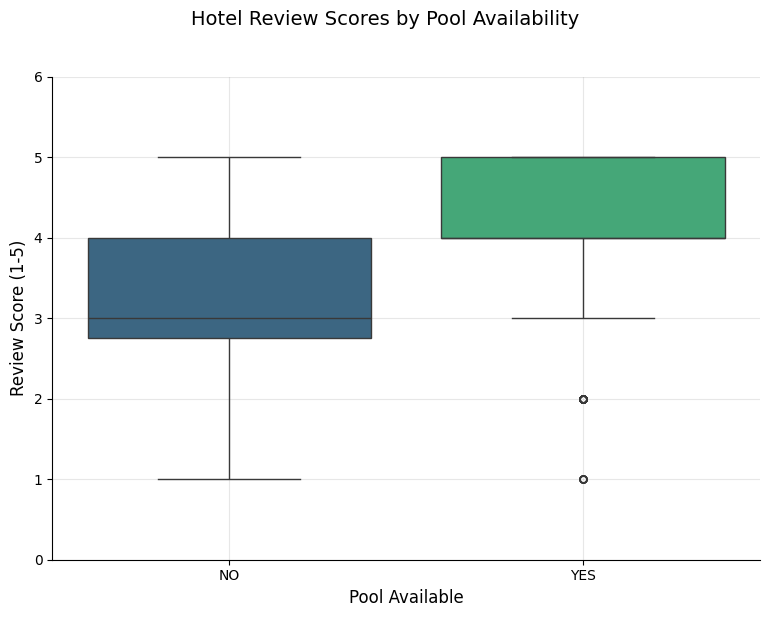

In [201]:
# sns.catplot() creates a FacetGrid object, allowing for more customization
g = sns.catplot(
    x="Pool",                    # Categorical variable on x-axis (Pool availability: YES/NO)
    y="Score",                   # Numerical variable on y-axis (Review scores: 1-5)
    data=reviews,                
    kind="box",                  
    height=6,                    # Figure height in inches
    aspect=1.3,                  # Width-to-height ratio (1.3 means 30% wider than tall)
    palette="viridis",           
    hue="Pool"
)


# Add a main title positioned slightly above the plot
g.figure.suptitle("Hotel Review Scores by Pool Availability", y=1.02, fontsize=14)

# Customize individual axes for enhanced readability
for ax in g.axes.flat:         # Iterate through all subplot axes in the grid
    ax.set_ylim(0, 6)          # Set consistent y-axis range from 0 to 6
    ax.grid(True, alpha=0.3)    # Add subtle grid lines (alpha controls transparency)
    ax.set_ylabel("Review Score (1-5)", fontsize=12)    # Detailed y-axis label
    ax.set_xlabel("Pool Available", fontsize=12)        # Clear x-axis label


plt.tight_layout()             
plt.show()                     

### Creating a box plot
When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable `"Helpful votes"` across the different categories found in the `"Traveler type"` variable.

In [202]:
# Setting "Traveler type" to a categorical type
reviews["Traveler type"] = reviews["Traveler type"].astype("category")

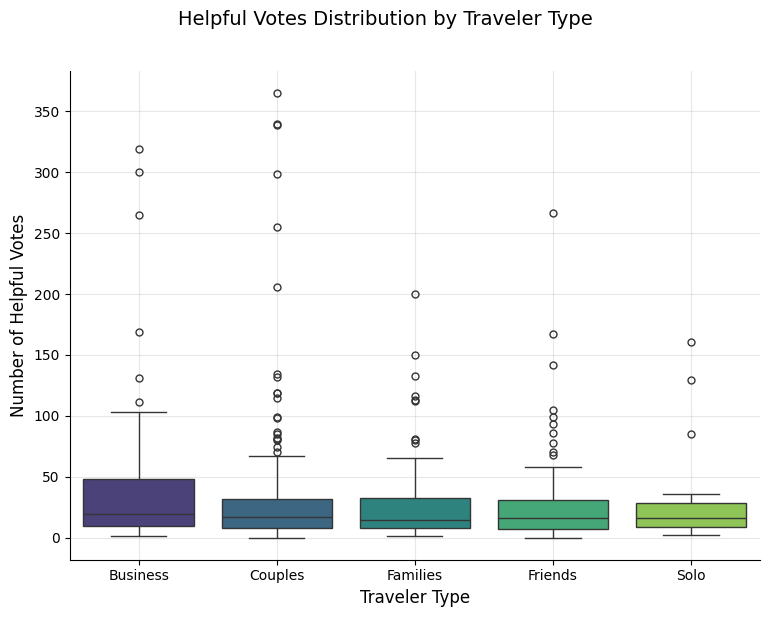

In [203]:
# Create a boxplot using catplot() with "Helpful votes" as the continuous variable split across each "Traveler type". Make sure that you are using the reviews dataset.
g = sns.catplot(x="Traveler type", y="Helpful votes", data=reviews, 
                kind="box", height=6, aspect=1.3, 
                palette="viridis", hue="Traveler type")


# Add meaningful title and axis labels
g.figure.suptitle("Helpful Votes Distribution by Traveler Type", y=1.02, fontsize=14)

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_ylabel("Number of Helpful Votes", fontsize=12)
    ax.set_xlabel("Traveler Type", fontsize=12)

plt.tight_layout()
plt.show() 

## Point and Count Plots with Seaborn

Seaborn’s categorical plotting suite (`catplot`) includes **point plots** and **count plots**—two powerful tools for summarising relationships and distributions in categorical data. Both types can reveal patterns, trends, and differences across groups, but are suited for different statistical questions and visual storytelling. This guide explains the principles, syntax, and best practices for both, with an emphasis on analytical clarity and publication-quality presentation using the object-oriented (OOP) approach.


####  What is a Point Plot?

A **point plot** visualises **summary statistics** (by default, the mean) for one numeric variable within each category of another variable. Points are plotted at each group mean and connected by lines to highlight trends or differences.

- **Statistic:** Typically mean (but can be changed).
- **Visual elements:** Points, confidence intervals, and optional connecting lines.
- **Best for:** Comparing trends or differences across categories, especially when the number of categories is moderate.

#### Syntax

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2, style="whitegrid")
g = sns.catplot(
    x="category", y="value", data=data_frame,
    kind="point", 
    height=5, aspect=1.2, 
    ci="sd",              # Error bars: standard deviation (or 95% CI by default)
    color="darkblue",     # Single colour, or use palette for multiple
    markers="o",          # Marker style for points
    linestyles="-",       # Line style connecting points
)
g.set_axis_labels("Category", "Statistic")
g.fig.suptitle("Point Plot of Value by Category", y=1.02)
plt.tight_layout()
plt.show()
```

### OOP Customisation and Aesthetics

- **Faceting:** Add `col`, `row`, or `hue` for subgroup analysis.
- **Marker/Line Styling:** Use `markers`, `linestyles`, and `palette` for clear group distinctions.
- **Legend control:** `g._legend.set_title("Legend Title")` for clarity.

#### Example: Point Plot with Grouping (Hue)

```python
g = sns.catplot(
    x="category", y="value",
    hue="subgroup", dodge=True,
    data=data_frame,
    kind="point", height=5, aspect=1.4,
    palette="viridis", markers=["o", "s", "D"], linestyles=["-", "--", ":"]
)
g.set_axis_labels("Category", "Mean Value")
g.fig.suptitle("Point Plot by Category and Subgroup", y=1.03)
plt.tight_layout()
plt.show()
```

#### Example: Disabling Lines (`join=False`)

Highlight points only (no trend lines):

```python
g = sns.catplot(
    x="category", y="value",
    data=data_frame,
    kind="point", join=False,
    height=4.5, aspect=1.2,
    palette="Set1"
)
g.set_axis_labels("Category", "Mean Value")
g.fig.suptitle("Point Plot (Points Only)", y=1.03)
plt.tight_layout()
plt.show()
```

### Statistics, Use-Cases, and Data Analysis

- **Point plots** show the mean (or chosen statistic) and its uncertainty for each category.
- **Visualises trends, differences, or interaction effects**—especially useful for repeated measures, experiments, or time series across groups.
- Use with moderate or small numbers of categories; for very wide or dense data, consider alternative summary plots.


#### What is a Count Plot?

A **count plot** displays the **number of occurrences** (frequency) of each category in a variable, typically as a bar plot. It is a direct visualisation of `.value_counts()` for a categorical variable.

- **Statistic:** Frequency/count (no y argument needed).
- **Visual elements:** Bars representing counts.
- **Best for:** Understanding the distribution and prevalence of categories.

#### Syntax

```python
g = sns.catplot(
    x="category", data=data_frame,
    kind="count",
    height=4.5, aspect=1.3,
    palette="pastel"
)
g.set_axis_labels("Category", "Count")
g.fig.suptitle("Count Plot of Category", y=1.02)
plt.tight_layout()
plt.show()
```

#### Example: Count Plot with Grouping (Hue)

```python
g = sns.catplot(
    x="category", hue="subgroup",
    data=data_frame,
    kind="count",
    height=5, aspect=1.2,
    palette="muted",
    dodge=True  # Split bars side-by-side for each subgroup
)
g.set_axis_labels("Category", "Count")
g.fig.suptitle("Count Plot by Category and Subgroup", y=1.02)
plt.tight_layout()
plt.show()
```


### Bar Plot vs. Point Plot

| Plot Type    | Statistic              | Best for                | Visual Output           |
|--------------|------------------------|-------------------------|-------------------------|
| Bar Plot     | Mean (or estimator)    | Comparing means         | Bars + error bars       |
| Point Plot   | Mean (or estimator)    | Trends/interactions     | Points + lines + CI     |
| Count Plot   | Count/frequency        | Category prevalence     | Bars                   |

- **Bar plot:** Emphasises size (area) and mean, often less precise for comparing means across many groups.
- **Point plot:** Emphasises trend and pattern, uses position and lines, ideal for comparing multiple groups or over ordered categories.


### OOP & Visual Tips 

- Always use `sns.set()` or `sns.set_theme()` to standardise plot appearance and font size.
- Customise palette, marker, and style to differentiate subgroups or highlight specific comparisons.
- Use facetting (`row`, `col`) for multi-panel comparative visualisation.
- Adjust plot size (`height`, `aspect`) for clarity in presentations or reports.
- Apply `plt.tight_layout()` to avoid label cut-off and improve aesthetics.
- Customise axis labels and titles for communicative, professional output.
- If many categories, rotate x-axis labels: `g.set_xticklabels(rotation=45)`.


**Point plots** and **count plots** in Seaborn’s `catplot` suite provide efficient, visually powerful methods to summarise, compare, and interpret categorical data in modern exploratory analysis. Point plots focus on summary statistics and trends; count plots reveal distribution and prevalence. Leverage the OOP interface for advanced control, stunning visuals, and publication-ready graphics in any analytical workflow.


In [204]:
reviews["Traveler type"] = reviews["Traveler type"].astype("category")

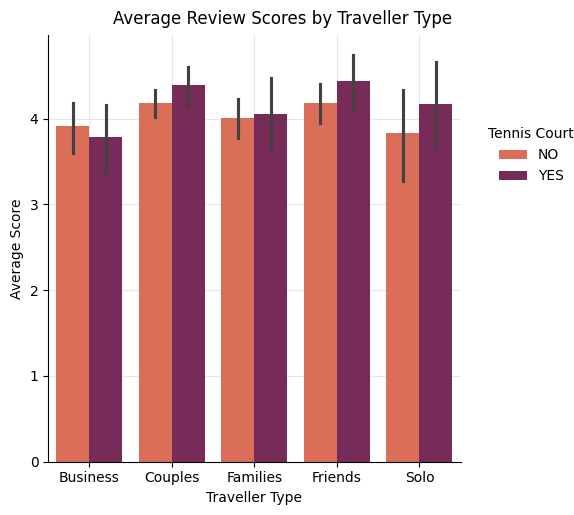

In [205]:
g = sns.catplot(
    data=reviews,
    x="Traveler type",
    y="Score",
    hue="Tennis court",
    kind="bar",
    palette="rocket_r"           # legend is created automatically
)

g.figure.suptitle("Average Review Scores by Traveller Type", y=1.02)
g.set_axis_labels("Traveller Type", "Average Score")

leg = g._legend                       # reference to the existing Legend instance
leg.set_title("Tennis Court")
leg.set_bbox_to_anchor((0.8, 0.8))     # move it to the right
leg.set_loc("upper left")

# Light grid beneath bars
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)

# Make room on the right for the legend
g.figure.subplots_adjust(right=0.8)
plt.show()


### Creating a bar plot
Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable `"Period of stay"`. 

In [206]:
reviews["Period of stay"] = reviews["Period of stay"].astype("category")
reviews["Period of stay"].value_counts()

Period of stay
Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: count, dtype: int64

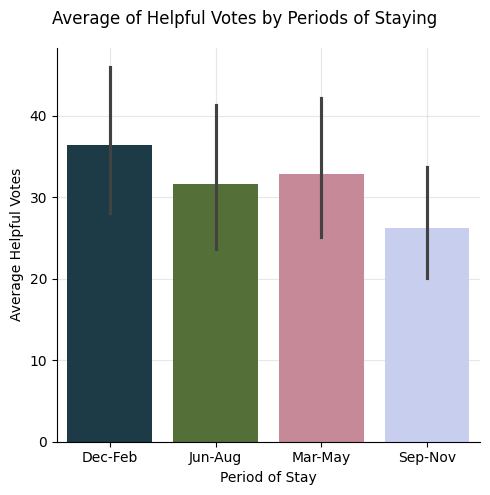

In [207]:
# Create a bar plot using catplot(); Split the reviews dataset on "Period of stay" across the x-axis
# Specify the numerical variable to aggregate on as "Helpful votes"
g = sns.catplot(x="Period of stay", y="Helpful votes", data=reviews, 
                kind="bar", palette="cubehelix", hue="Period of stay")  


g.figure.suptitle("Average of Helpful Votes by Periods of Staying")
g.set_axis_labels("Period of Stay", "Average Helpful Votes")  

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

### Ordering categories
Not all categories are created equal. In the hotel review dataset, `reviews`, hotel owners know that most of their customers are from North America. When visualizing data broken out by `"User continent"` they might want North America to appear first. An ordered list of user continents has been provided as `continent_categories`. In this exercise, you will work through preparing a visualization that is ordered by the frequency counts of a Series.

In [208]:
reviews["User continent"] = reviews["User continent"].astype("category")
reviews["User continent"].value_counts()

User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64

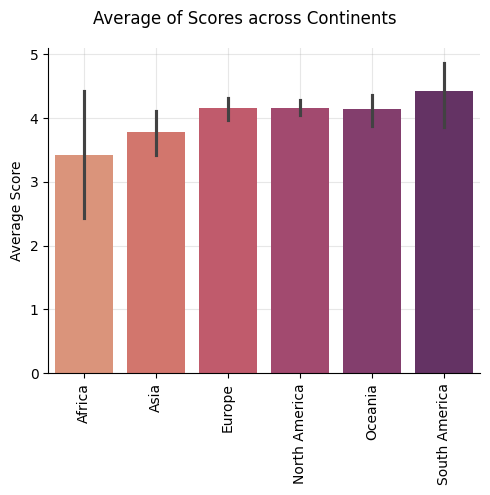

In [209]:
# Create a bar chart with "User continent" along the x-axis and "Score" along the y-axis.
g = sns.catplot(x="User continent", y="Score", data=reviews, 
                kind="bar", palette="flare", hue="User continent")
g.figure.suptitle("Average of Scores across Continents")
g.set_axis_labels("", "Average Score")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Center the tick labels with the bars
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right', va='center', rotation_mode='anchor')
    
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [210]:
# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)

reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories = continent_categories)

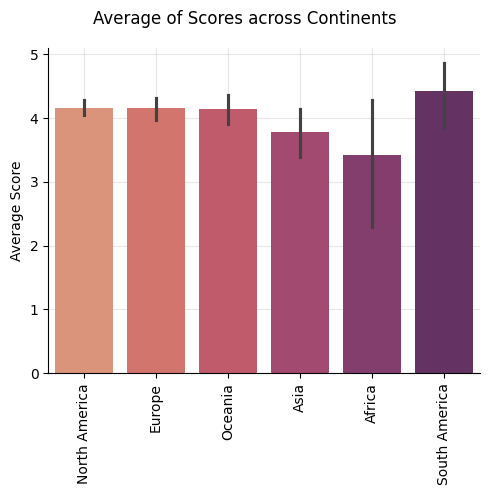

In [211]:
# Create a bar chart with "User continent" along the x-axis and "Score" along the y-axis.
g = sns.catplot(x="User continent", y="Score", data=reviews, 
                kind="bar", palette="flare", hue="User continent")

g.figure.suptitle("Average of Scores across Continents")
g.set_axis_labels("", "Average Score")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
   
    # Center the tick labels with the bars
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right', va='center', rotation_mode='anchor')
    
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

### Bar plot using hue
Aggregating information across multiple categories is often necessary to help stakeholders better understand their data. In preparation for building a dashboard that will allow users to select up to two variables when creating visualizations, you want to test visualizations that use different combinations of categorical variables using a bar plot.

In [212]:
reviews["Casino"] = reviews["Casino"].astype("category")
reviews["Free internet"] = reviews["Free internet"].astype("category")

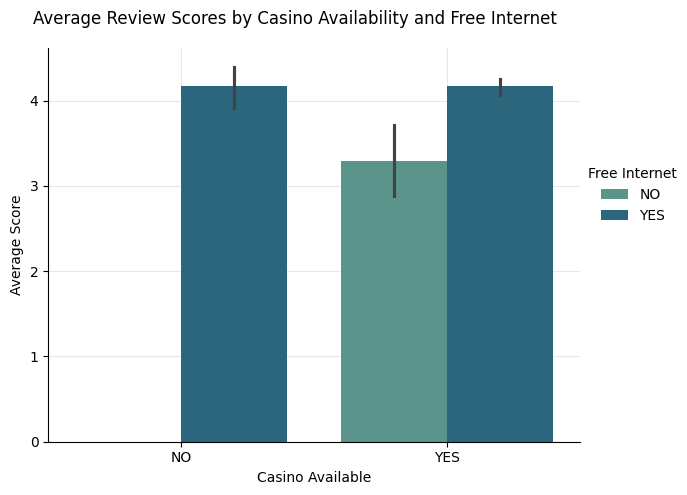

In [213]:
# Update the plot so that "Casino" (along the x-axis) and "Free internet" (to color the bars) are used to split the data.
g = sns.catplot(x="Casino", y="Score", data=reviews, 
                kind="bar", palette="crest", hue="Free internet")

g.figure.suptitle("Average Review Scores by Casino Availability and Free Internet")
g.set_axis_labels("Casino Available", "Average Score")

# Position the legend
leg = g._legend
leg.set_title("Free Internet")
leg.set_bbox_to_anchor((1.15, 0.6))

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    

plt.tight_layout()
plt.show()

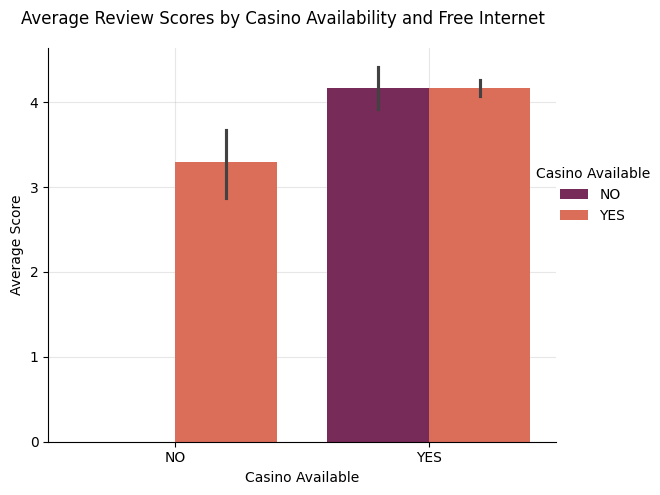

In [214]:
# Switch the categories so that "Free internet" is on the x-axis and "Casino" is in the legend.

g = sns.catplot(x="Free internet", y="Score", data=reviews, 
                kind="bar", palette="rocket", hue="Casino")

g.figure.suptitle("Average Review Scores by Casino Availability and Free Internet")
g.set_axis_labels("Casino Available", "Average Score")

# Position the legend
leg = g._legend
leg.set_title("Casino Available")
leg.set_bbox_to_anchor((1.15, 0.6))

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

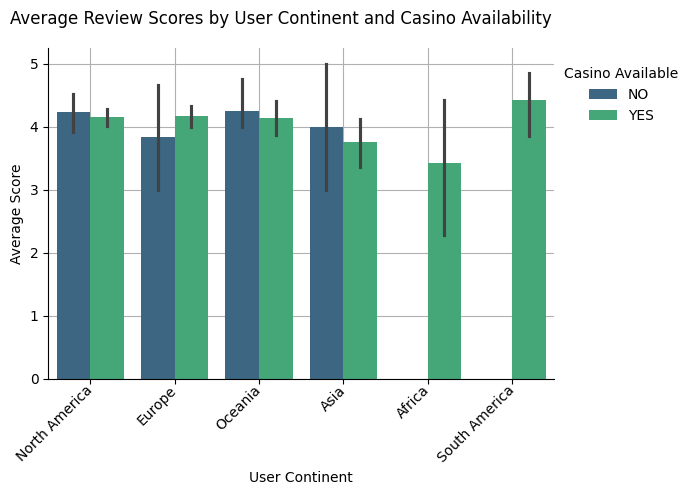

In [215]:
# Update the x parameter to be "User continent".

g = sns.catplot(x="User continent", y="Score", data=reviews, 
                kind="bar", palette="viridis", hue="Casino")
g.figure.suptitle("Average Review Scores by User Continent and Casino Availability")
g.set_axis_labels("User Continent", "Average Score")

# Position the legend
leg = g._legend
leg.set_title("Casino Available")
leg.set_bbox_to_anchor((1.20, 0.8))

for ax in g.axes.flat:
    ax.grid(True)
    ax.set_axisbelow(True)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", va="center", rotation_mode="anchor")

    
plt.tight_layout()
plt.show()

## Additional `catplot()` Options in Seaborn

Seaborn's `catplot()` is a high-level, flexible, and feature-rich interface for categorical data visualisation, built upon the powerful FacetGrid framework. However, the versatility of `catplot()` can present both technical and interpretive challenges: high-cardinality categorical variables, visual overcrowding, facet management, and colour differentiation. Mastery of `catplot()`'s additional options is essential for creating clear, compelling, and informative categorical plots in complex analytical scenarios.

This section covers advanced `catplot()` arguments and OOP strategies for producing visually appealing, insightful, and publication-ready graphics—agnostic to specific variables or datasets.

### Difficulties with Categorical Plots

- **High cardinality:** Too many categories can lead to overlapping labels or unreadable plots.
- **Overcrowded facets:** Faceting by multiple variables can create a large grid, challenging to interpret or present.
- **Colour confusion:** Poor palette selection can obscure group differences, especially with many categories or in accessibility-sensitive contexts.
- **Label and title management:** Ensuring that axis labels and titles are clear, descriptive, and properly formatted is critical for communication.


### Using the `catplot()` FacetGrid: OOP Advantages

Seaborn’s `catplot()` returns a **FacetGrid** object, not just an axes or figure. This enables:

- Advanced facetting: dividing data into grids by one or more categorical variables (e.g., columns, rows, or both).
- Fine-grained control of plot aesthetics, layout, and annotation.
- Modular updates to axis labels, tick marks, font scales, and titles.


### Key Arguments for Advanced Categorical Plots

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Setting global plot style for consistency
sns.set(font_scale=1.3, style="whitegrid")

g = sns.catplot(
    x="categorical_var",             # Variable on the x-axis
    kind="count",                    # Type of categorical plot (e.g., "count", "box", "bar", etc.)
    col="facet_var",                 # Facet across columns by another variable
    col_wrap=3,                      # Wrap columns after every 3 facets for better display
    palette=sns.color_palette("Set2"),  # Specify colour palette (use seaborn or custom)
    data=data_frame,                 # The DataFrame containing your data
    height=5,                        # Plot height (in inches)
    aspect=1.1                       # Aspect ratio (width/height)
)
```

### Palette and Colour Management

- **Predefined palettes:**  
  `"Set1"`, `"Set2"`, `"Paired"`, `"Dark2"`, `"Tab10"`, `"Pastel1"`, etc.  
  View all options: [Seaborn Palette Reference](https://seaborn.pydata.org/tutorial/color_palettes.html)
- **Custom palettes:**  
  Pass a list of colour hex codes or use `sns.color_palette()` for maximum control.

### Updating and Customising Plots (OOP Approach)

**Accessing the FacetGrid object:**  
All OOP customisation happens through the object returned by `catplot()` (commonly named `g` or `ax`).

```python
# Set the figure title
g.fig.suptitle("Descriptive Plot Title", y=1.03)

# Update axis labels
g.set_axis_labels("X Axis Label", "Y Axis Label")

# Adjust the layout for better spacing of titles and labels
plt.subplots_adjust(top=0.90)

# Optional: customise tick labels (e.g., rotate for readability)
for axes in g.axes.flat:
    axes.tick_params(axis='x', rotation=45)
    axes.set_ylabel("Custom Y Label")
    axes.set_xlabel("Custom X Label")

plt.tight_layout()
plt.show()
```

### Example: Faceting with Multiple Arguments

```python
g = sns.catplot(
    x="category",
    kind="count",
    col="facet_category",
    col_wrap=4,                           # Wraps columns into rows after every 4 facets
    palette=sns.color_palette("Tab10"),
    data=data_frame,
    height=4,
    aspect=1.3
)
g.fig.suptitle("Distribution of Category by Facet", y=1.02)
g.set_axis_labels("Category", "Count")
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()
```

**Tips:**
1) Use `col_wrap` to prevent overly wide plots when many facets are created.
2) Select palettes that maximise visual distinction for accessibility and clarity.
3) Adjust `height` and `aspect` to optimise for publication or presentation settings.


#### Some concepts:
**Facetting** allows comparison across subgroups and identification of interaction effects or heterogeneity.<br>
**Colour and layout control** are vital for avoiding misleading emphasis or unintentional occlusion of patterns.<br>
**Clear labelling and spacing** prevent cognitive overload, making plots interpretable and actionable for any audience.<br>
**FacetGrid OOP interface** enables layering additional Seaborn or Matplotlib annotations for advanced statistical storytelling.<br>


### Best Practices 

1) Choose `col_wrap` judiciously to maintain readable facets.
2) Leverage palette choices for both aesthetics and accessibility.
3) Use OOP controls for titles, axis labels, tick formatting, and spacing to produce publication-quality graphics.
4) Validate statistical meaning—ensure count or summary plots align with analytical goals.


Advanced use of `catplot()`—particularly with its facetting, palette, and OOP customisation options—unlocks the full power of categorical visualisation in Seaborn. Mastery of these parameters ensures your graphics are not only visually stunning but statistically robust and interpretable in any professional, academic, or exploratory context.


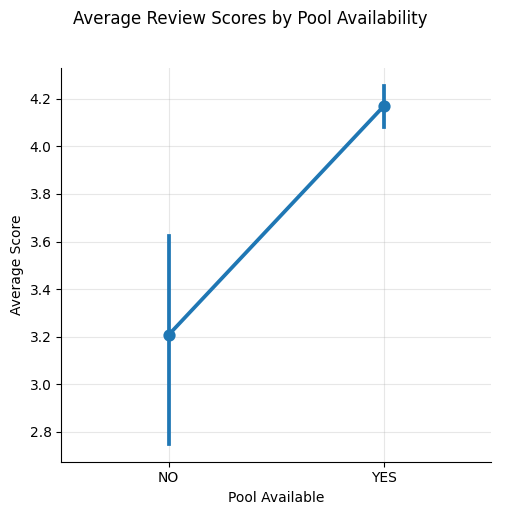

In [216]:
g = sns.catplot(x="Pool", y="Score", data=reviews, kind="point")

# Use OOP approach for customization
g.figure.suptitle("Average Review Scores by Pool Availability", y=1.02)
g.set_axis_labels("Pool Available", "Average Score")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

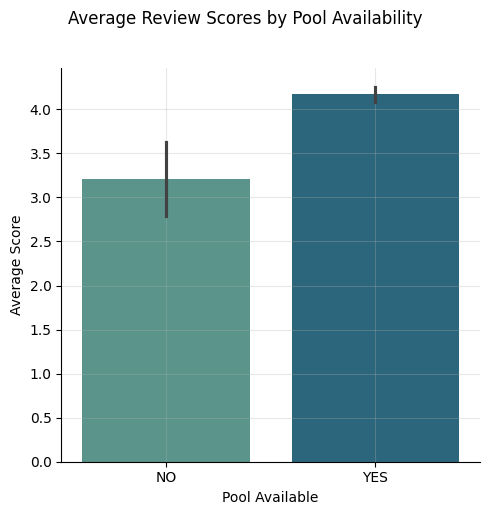

In [217]:
g = sns.catplot(x="Pool", y="Score", data=reviews, kind="bar", palette="crest", hue="Pool")

# Use OOP approach for customization
g.figure.suptitle("Average Review Scores by Pool Availability", y=1.02)
g.set_axis_labels("Pool Available", "Average Score")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

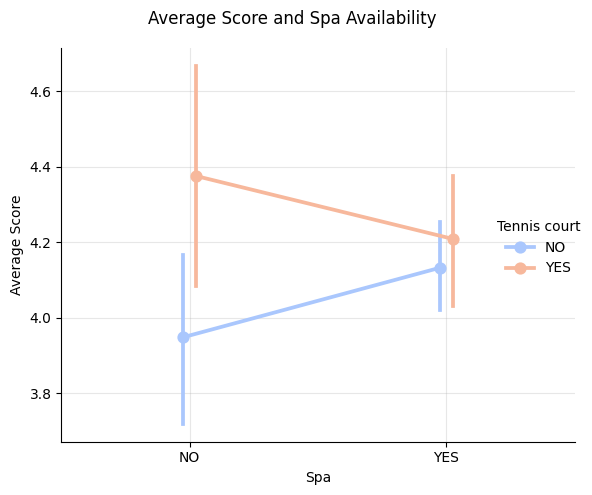

In [218]:
g = sns.catplot(x="Spa", y="Score", data=reviews, 
                kind="point", palette="coolwarm", hue="Tennis court", dodge=True)

g.set_axis_labels("Spa", "Average Score")
g.figure.suptitle("Average Score and Spa Availability")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

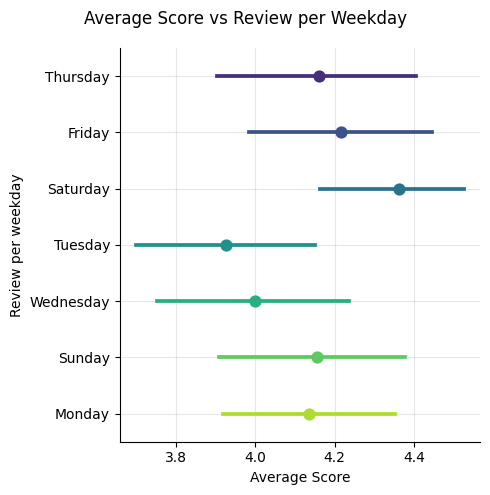

In [219]:
g = sns.catplot(x="Score", y="Review weekday", data=reviews, 
                kind="point", palette="viridis", linestyle='none', hue="Review weekday")

g.set_axis_labels("Average Score", "Review per weekday")
g.figure.suptitle("Average Score vs Review per Weekday")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

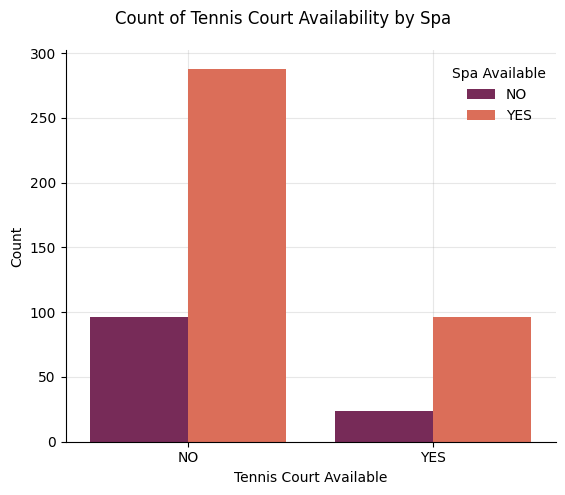

In [220]:
g = sns.catplot(x="Tennis court", data=reviews, 
                kind="count", hue="Spa", palette="rocket")

g.set_axis_labels("Tennis Court Available", "Count")
g.figure.suptitle("Count of Tennis Court Availability by Spa")

# Position the legend
leg = g._legend
leg.set_title("Spa Available")
leg.set_bbox_to_anchor((0.97, 0.8))

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

### Creating a point plot
Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, `"Nr. reviews"`, which is the number of reviews a reviewer has previously written, across a hotel's star rating, `"Hotel stars"`. Since the number of reviews is numerical, you have decided to use a point plot to show the mean of the data across the categories.

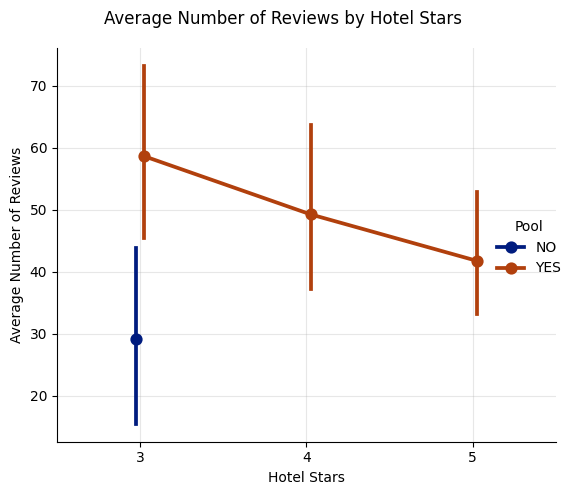

In [221]:
# Ensure Hotel stars is categorical for proper ordering
reviews["Hotel stars"] = reviews["Hotel stars"].astype("category")

# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
g = sns.catplot(x="Hotel stars", y="Nr. reviews", data=reviews,
                kind="point", palette="dark", hue="Pool", dodge=True)

g.set_axis_labels("Hotel Stars", "Average Number of Reviews")
g.figure.suptitle("Average Number of Reviews by Hotel Stars")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

When creating quick analysis of frequency counts, you have been using `.value_counts()`. This is a great way for you to see the counts and get an idea of which categories are present in the data. However, sending frequency tables to clients or coworkers may not always be a good idea. For this exercise, you will visualize the number of reviews by their `"Score"`. Although `"Score"` has been used as a numerical variable in the past, it can be used as a categorical variable given that it has five unique values that are ordered from worst to best. The `reviews` dataset has been preloaded.

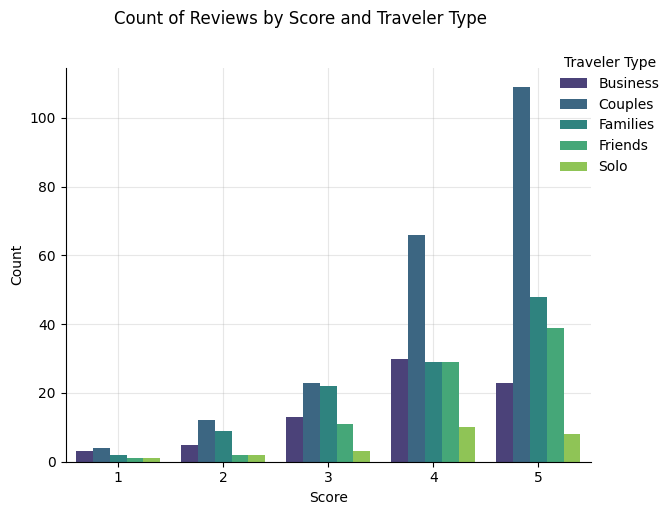

In [222]:
# Use the catplot() function to display count frequencies using the reviews dataset.

# Count the frequencies for the "Score" variable across the x-axis.
# When counting the frequencies, color the bars using the "Traveler type" column.
g = sns.catplot(x="Score", data=reviews, 
                kind="count", palette="viridis", hue="Traveler type", dodge=True)

g.set_axis_labels("Score", "Count")
g.figure.suptitle("Count of Reviews by Score and Traveler Type", y=1.02)

# Position the legend
leg = g._legend
leg.set_title("Traveler Type")
leg.set_bbox_to_anchor((1.1, 0.8))

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

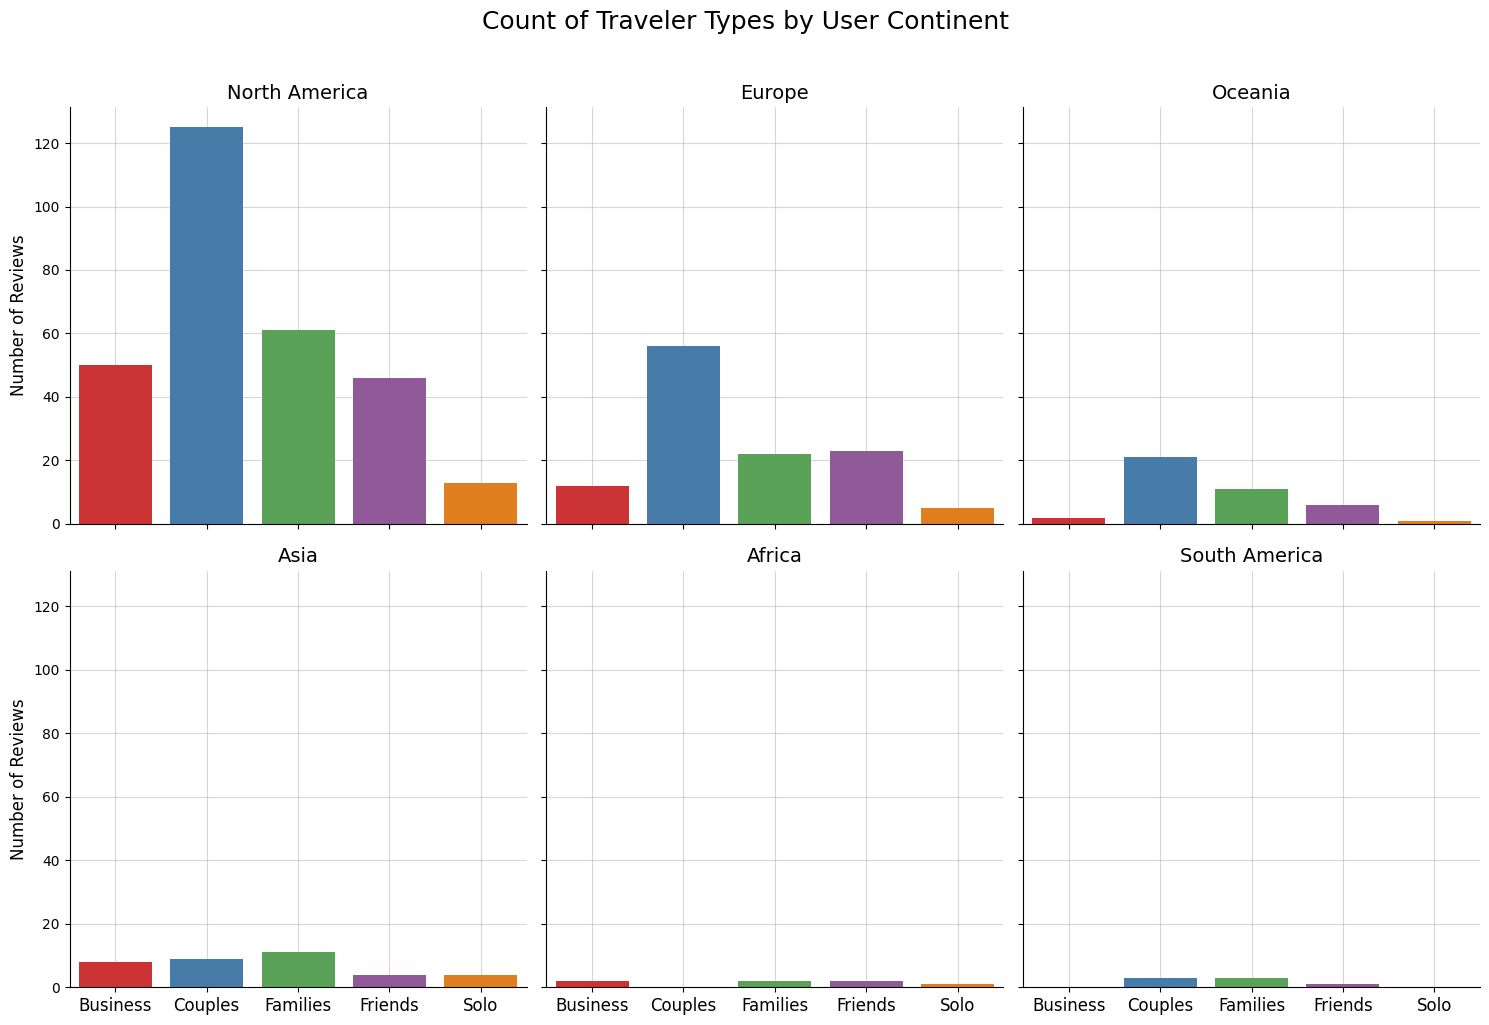

In [223]:
g = sns.catplot(x="Traveler type", data=reviews, 
                kind="count", col="User continent", col_wrap=3, 
                palette=sns.color_palette("Set1", 5), hue="Traveler type", sharex=True)

g.figure.suptitle("Count of Traveler Types by User Continent", y=1.02, fontsize=18)

g.set_titles("{col_name}", size=14)

for ax in g.axes.flat:
    ax.grid(True, alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_xlabel("")
    ax.set_ylabel("Number of Reviews", fontsize=12)
    ax.tick_params(axis='x', labelsize=12)


plt.tight_layout()
plt.show()


### One visualization per group
While working on a data exploration project, you have been asked to visualize the number of reviews of hotels by `"Period of stay"` and by the day of the week, `"Review weekday"`. The goal of this visualization is to see what day of the week has the most `reviews` for each of the four periods of stay. 

- Create a catplot() using "count" as the type of graphic.
- Count the number of reviews by "Review weekday".
- Create individual plots for each "Period of stay".
- Wrap the plots after every 2nd graphic.

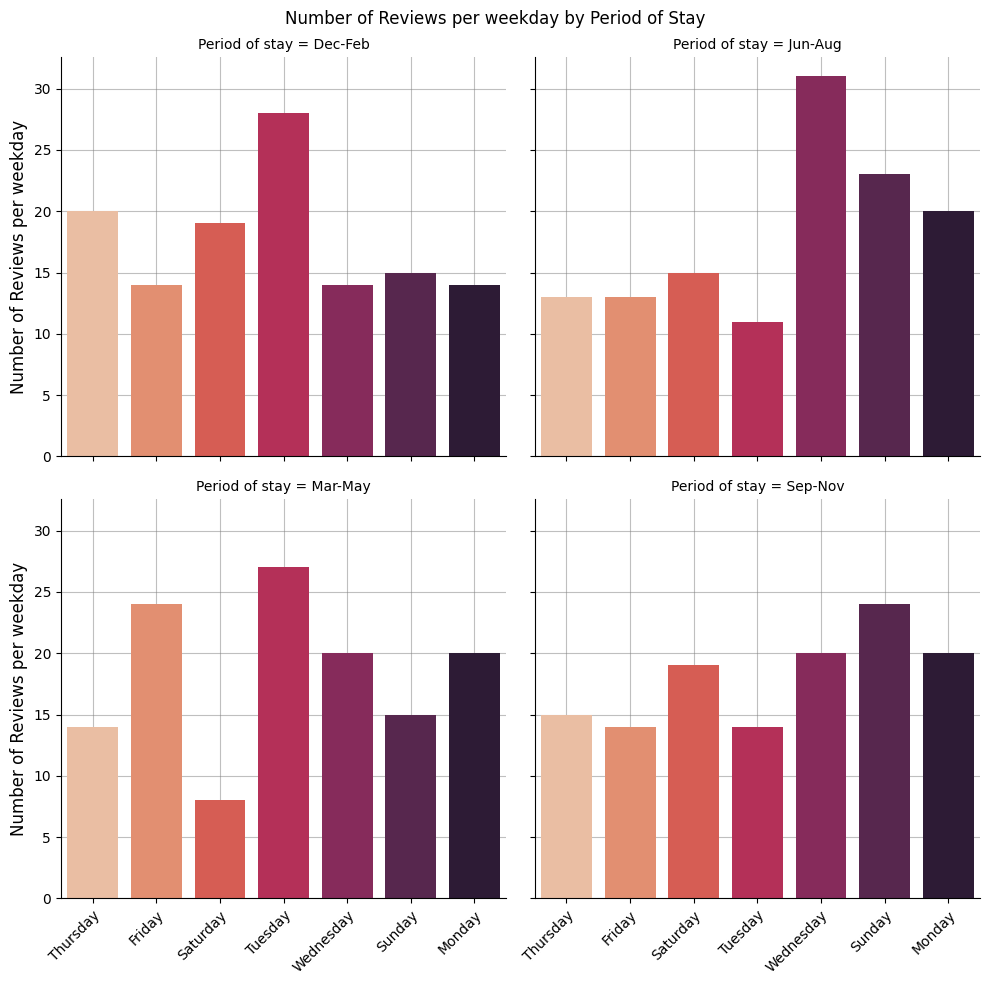

In [224]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
g = sns.catplot(x="Review weekday", data=reviews, 
                kind="count", col="Period of stay", col_wrap=2,
                palette="rocket_r", hue="Review weekday", sharex=True)

g.figure.suptitle("Number of Reviews per weekday by Period of Stay")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.5, color='gray', linewidth=0.8)
    ax.set_axisbelow(True)
    ax.set_xlabel("")
    ax.set_ylabel("Number of Reviews per weekday", fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    
plt.subplots_adjust(top=.9)
plt.tight_layout()
plt.show()

### Updating categorical plots
Hotels are constantly working to get better reviews from their customers. A hotel chain has asked you to create visualizations to help the company understand why people might provide various ratings after staying at their hotels. A manager has asked if hotels with `"Free internet"` receive higher reviews given the `"Traveler type"`.

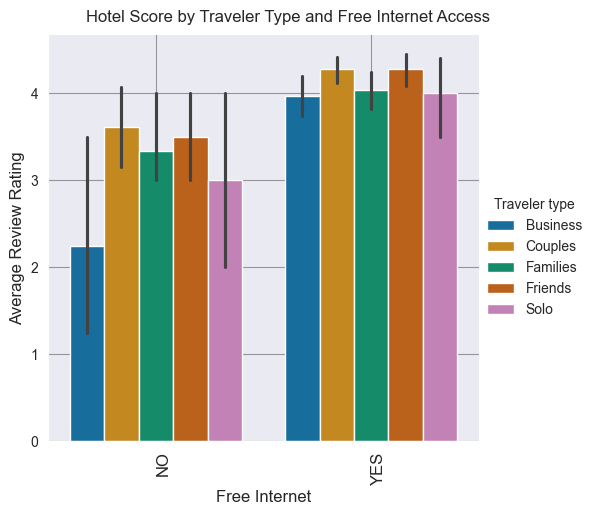

In [225]:
with sns.axes_style("darkgrid"):

    sns.set_style("darkgrid")  

    g = sns.catplot(x="Free internet", y="Score", data=reviews,
                    hue="Traveler type", kind="bar", palette="colorblind")

    g.figure.suptitle("Hotel Score by Traveler Type and Free Internet Access")

    for ax in g.axes.flat:
        ax.grid(True, alpha=0.8, color="gray", linewidth=0.8)
        ax.set_axisbelow(True)
        ax.set_xlabel("Free Internet", fontsize=12)
        ax.set_ylabel("Average Review Rating", fontsize=12)
        ax.tick_params(axis='x', labelsize=12)
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
        
    plt.subplots_adjust(top=.93)
    plt.show()

## Categorical Pitfalls: Limitations, Gotchas, and Practical Realities in Pandas

While the `category` dtype in Pandas offers substantial advantages for qualitative data—especially memory efficiency and explicit semantics—it is not a universal solution. Understanding where, when, and how to use categorical data types, along with their quirks and limitations, is essential for robust, frustration-free data science. This section rigorously explores the principal pitfalls, workarounds, and critical considerations when working with categorical data in a fully agnostic, context-free way.

### Memory Savings: Not Always as Expected

**Substantial savings:**  
For variables with **few unique values** (low cardinality) and many repeated entries, converting to `category` yields dramatic reductions in memory usage:

```python
# Example for a low-cardinality categorical variable
print("As object:   ", df["variable"].nbytes)
print("As category: ", df["variable"].astype("category").nbytes)
```

**Marginal savings:**  
For variables with **many unique values** (high cardinality), such as unique IDs or large numeric domains, converting to `category` may result in little or **no memory gain**—sometimes even a net loss, due to the overhead of storing category codes and the mapping.


### Compatibility Pitfalls: The Dark Side of Categories

#### String Methods and the .str Accessor

- Using string methods on a categorical Series (e.g., `.str.upper()`, `.str.contains()`) **converts the Series back to `object` dtype**, losing the benefits of categoricals.
    ```python
    df["cat_var"] = df["cat_var"].astype("category")
    df["cat_var"] = df["cat_var"].str.lower()    # Returns object dtype!
    ```
    **Best practice:** Clean or transform string values **before** converting to categorical.

#### Apply Methods

- Applying functions with `.apply()` to a categorical column typically **returns an object dtype**.
    ```python
    df["cat_var"] = df["cat_var"].apply(custom_func)  # Back to object
    ```

#### NumPy and Categorical Data

- Most NumPy methods (`np.sum`, `np.mean`, etc.) **do not work** on categorical Series.
    ```python
    df["cat_var"] = df["cat_var"].astype("category")
    total = df["cat_var"].sum()   # TypeError: Categorical cannot perform the operation sum
    ```
- **Workaround:** Convert to integer or float first, if the codes are meaningful.
    ```python
    df["cat_var"].astype(int).sum()
    ```

### Setting and Managing Categories: NaN Traps

#### Setting Categories Explicitly

- Setting allowed categories with `.cat.set_categories([...])` **drops any values not listed** (sets them to `NaN`).
    ```python
    df["cat_var"] = df["cat_var"].astype("category")
    df["cat_var"].cat.set_categories(["A", "B", "C"], inplace=True)
    ```
    - Any value not among `["A", "B", "C"]` becomes `NaN`.
    - Large amounts of missing data may result if categories are not carefully managed.

#### Checking for Missing Values

- Always check frequency counts (including `NaN`) after category assignment:
    ```python
    df["cat_var"].value_counts(dropna=False)
    ```


### Conversion and Chain Operations: Stay Mindful of Types

- After any string operation or data transformation on a categorical column, **explicitly convert back to `category`** if you wish to regain memory efficiency or categorical behaviour:
    ```python
    df["cat_var"] = df["cat_var"].str.upper()      # becomes object dtype
    df["cat_var"] = df["cat_var"].astype("category")
    ```
- **Do not assume dtype persistence** across chained operations.


### Analysis and Statistical Operations: Know the Boundaries

- Most mathematical and statistical operations are **not supported** for categorical variables (other than simple `groupby`, `value_counts`, etc.).
    - **Count/frequency operations:** Supported.
    - **Arithmetic operations, summary stats:** Not supported unless categories represent ordered, numeric values (and are converted accordingly).

- Always validate your data types and consider converting to integer or float for meaningful numeric operations.

### Rationale

- **Statistical rationale:**  
  Categorical dtypes encode the true qualitative nature of the variable, reducing risk of inappropriate arithmetic, enabling fast and correct group-based analysis, and supporting explicit ordinal semantics.

- **Memory and performance:**  
  Dramatic memory savings for low-cardinality columns, but not a panacea—test and profile memory use for each column type in your workflow.

- **Robust workflow:**  
  Clean, standardise, and validate data before conversion to category.  
  After string or apply operations, reconvert as needed.  
  Be careful when setting new categories—unexpected `NaN` values can arise.


### Best Practices 

- **Always profile memory before and after dtype changes**, especially for large or high-cardinality columns.
- **Use category for true qualitative variables only**—not for unique identifiers or continuous measurements.
- **Transform, clean, and check** before conversion; reconvert after any incompatible operations.
- **Handle missing categories and `NaN` values** consciously after each manipulation.
- **Document dtype and cleaning logic** for each categorical column for reproducibility and transparency.



Categorical dtypes in Pandas are a double-edged sword: essential for high-quality, efficient analysis of qualitative data, but full of subtle limitations, gotchas, and quirks. Awareness of these pitfalls, along with disciplined workflow and dtype management, is crucial for avoiding frustration and producing robust, reproducible analyses in any data science context.


In [226]:
used_cars = pd.read_csv("data/cars.csv")
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [227]:
print(f"As object:{used_cars["manufacturer_name"].nbytes}")
print(f"As category: {used_cars["manufacturer_name"].astype("category").nbytes}")

As object:308248
As category: 38971


In [228]:
used_cars["odometer_value"].astype("object").describe()

count      38531
unique      6063
top       300000
freq        1794
Name: odometer_value, dtype: int64

In [229]:
print(f"As object:{used_cars["odometer_value"].nbytes}")
print(f"As category: {used_cars["odometer_value"].astype("category").nbytes}")

As object:308248
As category: 125566


In [230]:
# Print the frequency table of the "body_type" column for used_cars and include NaN values.
used_cars["body_type"].value_counts(dropna=False)

body_type
sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: count, dtype: int64

In [231]:
# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()
used_cars["body_type"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Universal
1        Universal
2              Suv
3            Sedan
4        Universal
           ...    
38526        Sedan
38527    Hatchback
38528        Sedan
38529      Minivan
38530      Minivan
Name: body_type, Length: 38531, dtype: object>

In [232]:
# Check the dtype of the "body_type" column.
used_cars["body_type"].dtype

dtype('O')

## Label Encoding: Principles, Strategies, and Practical Implementation

**Label encoding** is a data preprocessing technique used for converting categorical data (text or qualitative) into numerical form by assigning each unique category a specific integer code. It is often employed to reduce memory consumption, streamline analyses, and simplify statistical or descriptive presentations. However, label encoding has specific applications, strengths, and notable limitations, particularly regarding statistical validity and machine learning performance.

This guide rigorously explores label encoding, offering conceptual clarity, statistical reasoning, and robust implementations, independent of dataset or domain specifics.


### What is Label Encoding?

**Label encoding** involves assigning each distinct category within a categorical variable a unique integer code from **0 to (n - 1)**, where **n** is the number of categories. A special integer, typically **-1**, is reserved to represent missing values (`NaN`).

**Example transformation:**
- Original categories: `["Apple", "Orange", "Banana"]`
- Encoded categories: `[0, 1, 2]`

#### Advantages of Label Encoding:
- **Memory efficiency:** Numeric representations require less memory than strings.
- **Data simplification:** Easier storage and manipulation.
- **Surveys and statistical tables:** Commonly used for succinct representations.

### Drawbacks and Cautions:
- **Arbitrary ordering:** Encoding implies an arbitrary numeric order, potentially misleading statistical interpretation.
- **Machine learning risks:** Algorithms may infer non-existent numeric relationships (e.g., "Banana > Apple").


### Creating Label Encodings in Pandas

#### Step-by-Step Implementation

1. **Convert to categorical dtype first:**

```python
data_frame["categorical_var"] = data_frame["categorical_var"].astype("category")
```

2. **Generate numeric codes:**

```python
data_frame["category_code"] = data_frame["categorical_var"].cat.codes
```

- The `.cat.codes` attribute provides integer encoding directly from categorical dtype.
- Missing values (`NaN`) are automatically encoded as `-1`.

#### Checking Output

Always verify the correctness:

```python
print(data_frame[["categorical_var", "category_code"]].head())
```

### Creating a Code Book (Data Dictionary)

A **code book** or **data dictionary** clearly documents the mapping between categorical variables and their numeric codes, essential for transparency, reproducibility, and clarity.

**Generate a code book dictionary:**

```python
codes = data_frame["categorical_var"].cat.codes.unique()
categories = data_frame["categorical_var"].cat.categories
code_book = dict(zip(codes, categories))
```

**Inspecting a code book:**

```python
print(code_book)
# Output example: {0: 'Apple', 1: 'Banana', 2: 'Orange'}
```


### Reversing Label Encoding (Decoding)

Use `.map()` to reverse numeric codes back to categorical labels, essential for interpretation or reporting:

```python
data_frame["original_labels"] = data_frame["category_code"].map(code_book)
```

- This restores categorical clarity from encoded values.

### Boolean Encoding: Special Case of Label Encoding

Boolean encoding assigns binary (0/1) codes based on conditional logic. It is useful for binary categories or presence/absence variables.

**Implementation using NumPy’s `np.where()`:**

```python
import numpy as np

# Create binary labels based on a condition
data_frame["binary_code"] = np.where(
    data_frame["categorical_var"].str.contains("target_string", regex=False), 1, 0
)

# Check frequencies
print(data_frame["binary_code"].value_counts())
```

- Particularly useful for presence-absence coding, simplifying exploratory analysis and statistical testing.


### Visualization Strategies for Encoded Categories (OOP Approach)

Visualisation clarifies relationships, distributions, or issues (such as imbalances) within encoded categories.

**Count Plot (OOP):**

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.3)

g = sns.catplot(
    x="category_code",
    kind="count",
    data=data_frame,
    height=5,
    aspect=1.4,
    palette="Set2"
)

# OOP enhancements
g.set_axis_labels("Category Code", "Frequency")
g.fig.suptitle("Frequency of Label Encoded Categories", y=1.03)

plt.tight_layout()
plt.show()
```

**Tips for Stunning Plots:**
- Clearly label axis with both numeric codes and original categories (when space allows).
- Choose palettes enhancing readability and accessibility.
- Adjust `height`, `aspect`, and layout parameters (`plt.tight_layout()`) for visual balance.

### Label Encoding vs. One-Hot Encoding

| Encoding Method     | Numeric representation | Ideal for ML? | Memory efficiency | Statistical Interpretation |
|---------------------|------------------------|---------------|-------------------|----------------------------|
| Label Encoding      | Integers (0, 1, 2...)  | Usually No    | High              | Potentially misleading     |
| One-Hot Encoding    | Binary vectors         | Usually Yes   | Lower             | Statistically neutral      |

- Label encoding: best for descriptive summaries or memory-constrained scenarios.
- One-hot encoding: recommended for most machine learning tasks to avoid misleading numeric relationships.


### Rationale

- **Ordinal assumption:** Label encoding implicitly imposes an order—appropriate only if categories are truly ordinal (e.g., "Low", "Medium", "High").
- **Survey and census applications:** Commonly used to simplify analysis and storage of large-scale categorical data.
- **Data preparation:** Ideal for reducing complexity before downstream analysis, provided interpretation remains transparent.

### Best Practices and Recommendations

- Clearly document the encoding scheme in a code book.
- Validate and reverse encoding regularly to verify correctness.
- Limit label encoding use for ordinal categories or simple descriptive purposes.
- Consider alternative encodings (like one-hot) for predictive modelling.


Label encoding provides concise, efficient numeric representation of categorical data, useful for storage, simple descriptive analysis, and certain statistical scenarios. However, careful consideration and transparency are crucial to ensure interpretability and avoid statistical pitfalls—particularly regarding arbitrary numeric ordering in non-ordinal categories. Mastery of label encoding enhances both the robustness and clarity of your categorical data workflow.


In [233]:
used_cars["manufacturer_name"] = used_cars["manufacturer_name"].astype("category")

used_cars["manufacturer_code"] = used_cars["manufacturer_name"].cat.codes

display(used_cars[["manufacturer_name", "manufacturer_code"]])

,manufacturer_name,manufacturer_code
0,Subaru,45
1,Subaru,45
2,Subaru,45
3,Subaru,45
4,Subaru,45
...,...,...
38526,Chrysler,8
38527,Chrysler,8
38528,Chrysler,8
38529,Chrysler,8


In [234]:
codes = used_cars["manufacturer_name"].cat.codes
categories = used_cars["manufacturer_name"].astype("category")
name_map = dict(zip(codes, categories))

In [235]:
name_map

{45: 'Subaru',
 24: 'LADA',
 12: 'Dodge',
 54: 'УАЗ',
 23: 'Kia',
 35: 'Opel',
 53: 'Москвич',
 1: 'Alfa Romeo',
 0: 'Acura',
 10: 'Dacia',
 27: 'Lexus',
 33: 'Mitsubishi',
 25: 'Lancia',
 9: 'Citroen',
 32: 'Mini',
 21: 'Jaguar',
 38: 'Porsche',
 44: 'SsangYong',
 11: 'Daewoo',
 15: 'Geely',
 50: 'ВАЗ',
 13: 'Fiat',
 14: 'Ford',
 39: 'Renault',
 42: 'Seat',
 40: 'Rover',
 48: 'Volkswagen',
 28: 'Lifan',
 22: 'Jeep',
 5: 'Cadillac',
 2: 'Audi',
 52: 'ЗАЗ',
 47: 'Toyota',
 51: 'ГАЗ',
 49: 'Volvo',
 7: 'Chevrolet',
 16: 'Great Wall',
 4: 'Buick',
 37: 'Pontiac',
 29: 'Lincoln',
 18: 'Hyundai',
 34: 'Nissan',
 46: 'Suzuki',
 3: 'BMW',
 30: 'Mazda',
 26: 'Land Rover',
 20: 'Iveco',
 43: 'Skoda',
 41: 'Saab',
 19: 'Infiniti',
 6: 'Chery',
 17: 'Honda',
 31: 'Mercedes-Benz',
 36: 'Peugeot',
 8: 'Chrysler'}

In [236]:
# Reverting to previous values:
used_cars["manufacturer_code"].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

### Create a label encoding and map
A used car company believes that they can predict a car's sales price reasonably well using their `used_cars` dataset. One of the variables they want to use, `"color"`, needs to be converted to codes. The company believes that a car's color will be important when predicting sales price.

In [237]:
# Convert the color column to a categorical Series.
used_cars["color"] = used_cars["color"].astype("category")
used_cars["color"].value_counts()

color
black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: count, dtype: int64

### Using saved mappings
You are using a subset of a dataset and have been asked to create visualizations summarizing the output. As the dataset currently stands, all you see are numbers! Luckily, you had created and saved dictionaries (`color_map`, `fuel_map`, and `transmission_map`) that will map these columns back to their original categorical names. The dataset `used_cars_updated` has been preloaded.

In [238]:
# Create a new column, "color_code", by creating a label encoding for the variable "color".
used_cars["color_code"] = used_cars["color"].cat.codes

# Before you forget which codes belong to which categories, create a color map using the codes and categories objects.
codes = used_cars["color_code"]
categories = used_cars["color"]
color_map = dict(zip(codes, categories))
used_cars.drop("color", inplace=True, axis=1)
color_map

{8: 'silver',
 1: 'blue',
 7: 'red',
 0: 'black',
 4: 'grey',
 6: 'other',
 2: 'brown',
 10: 'white',
 3: 'green',
 9: 'violet',
 5: 'orange',
 11: 'yellow'}

In [239]:
# Create a new column, "fuel_code", by creating a label encoding for the variable "fuel_engine".
used_cars["engine_fuel"] = used_cars["engine_fuel"].astype("category")
used_cars["fuel_code"] = used_cars["engine_fuel"].cat.codes

# Before you forget which codes belong to which categories, create a fuel map using the codes and categories objects.
codes = used_cars["fuel_code"]
categories = used_cars["engine_fuel"]

fuel_map = dict(zip(codes, categories))
used_cars.drop("engine_fuel", inplace=True, axis=1)

In [240]:
# Create a new column, "transmission_code", by creating a label encoding for the variable "transmission".
used_cars["transmission"] = used_cars["transmission"].astype("category")
used_cars["transmission_code"] = used_cars["transmission"].cat.codes

# Before you forget which codes belong to which categories, create a transmission map using the codes and categories objects.
codes = used_cars["transmission_code"]
categories = used_cars["transmission"]

transmission_map = dict(zip(codes, categories))
used_cars.drop("transmission", inplace=True, axis=1)

In [241]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer_name  38531 non-null  category
 1   model_name         38531 non-null  object  
 2   odometer_value     38531 non-null  int64   
 3   year_produced      38531 non-null  int64   
 4   engine_has_gas     38531 non-null  bool    
 5   engine_type        38531 non-null  object  
 6   engine_capacity    38521 non-null  float64 
 7   body_type          38531 non-null  object  
 8   has_warranty       38531 non-null  bool    
 9   state              38531 non-null  object  
 10  drivetrain         38531 non-null  object  
 11  price_usd          38531 non-null  float64 
 12  is_exchangeable    38531 non-null  bool    
 13  location_region    38531 non-null  object  
 14  number_of_photos   38531 non-null  int64   
 15  up_counter         38531 non-null  int64   
 16  feat

In [242]:
# Update the "color" column back to its original values using the color_map dictionary.
used_cars["color"] = used_cars["color_code"].map(color_map)
used_cars.drop("color_code", inplace=True, axis=1)

# Update the "engine_fuel" column back to its original values using the fuel_map dictionary.
used_cars["engine_fuel"] = used_cars["fuel_code"].map(fuel_map)
used_cars.drop("fuel_code", inplace=True, axis=1)

# Update the "transmission" column back to its original values using the transmission_map dictionary.
used_cars["transmission"] = used_cars["transmission_code"].map(transmission_map)
used_cars.drop("transmission_code", inplace=True, axis=1)

# Use .info() on the dataset to see if the dtypes have changed.
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer_name  38531 non-null  category
 1   model_name         38531 non-null  object  
 2   odometer_value     38531 non-null  int64   
 3   year_produced      38531 non-null  int64   
 4   engine_has_gas     38531 non-null  bool    
 5   engine_type        38531 non-null  object  
 6   engine_capacity    38521 non-null  float64 
 7   body_type          38531 non-null  object  
 8   has_warranty       38531 non-null  bool    
 9   state              38531 non-null  object  
 10  drivetrain         38531 non-null  object  
 11  price_usd          38531 non-null  float64 
 12  is_exchangeable    38531 non-null  bool    
 13  location_region    38531 non-null  object  
 14  number_of_photos   38531 non-null  int64   
 15  up_counter         38531 non-null  int64   
 16  feat

### Creating a Boolean encoding
In preparation for running machine learning models to estimate the sale price of used cars, you are starting to analyze the available columns of the `used_cars` dataset and want to create columns that can be used in training. One of the managers of a used car dealership has said that the manufacturer of the car is the most important aspect he considers when setting prices. You will begin by exploring the `manufacturer_name` column.

In [243]:
# Print the manufacturer name frequency table
print(used_cars["manufacturer_name"].value_counts())

manufacturer_name
Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia         

In [244]:
# Create a column, "is_volkswagen", that is 1 when "manufacturer_name" contains "Volkswagen" and 0 otherwise.
used_cars["is_volkswagen"] = np.where(
    used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)
used_cars["is_volkswagen"].value_counts()

is_volkswagen
0    34288
1     4243
Name: count, dtype: int64

## One-Hot Encoding

**One-hot encoding** is a categorical data transformation technique used to convert categorical variables into a numeric format suitable for statistical analysis and machine learning algorithms. Unlike label encoding, which assigns each category an integer and unintentionally implies ordinal relationships, one-hot encoding creates binary indicator columns—each category becomes a separate binary variable indicating its presence (1) or absence (0).

This section rigorously explores the theory, rationale, syntax, and practicalities of one-hot encoding, delivering comprehensive insights independent of any specific dataset or domain context.


### Why One-Hot Encoding Instead of Label Encoding?

#### Limitations of Label Encoding:
- **Implicit ordering**: Label encoding assigns integers (0, 1, 2, ...), implying a numeric relationship that may not exist.
- **Misinterpretation by algorithms**: Many statistical and machine learning algorithms assume numerical order matters, potentially distorting model results.

### Advantages of One-Hot Encoding:
- **Preserves categorical neutrality**: No implied numeric relationships among categories.
- **Compatible with linear and nonlinear algorithms**: Suitable for regression, decision trees, neural networks, and other methods.
- **Improved statistical validity**: Accurately represents nominal categories.


### How One-Hot Encoding Works

Consider a categorical variable with three distinct categories: `["Apple", "Orange", "Banana"]`.

| Original Category | Apple | Orange | Banana |
|-------------------|-------|--------|--------|
| Apple             | 1     | 0      | 0      |
| Orange            | 0     | 1      | 0      |
| Banana            | 0     | 0      | 1      |

Each original category creates a binary "dummy" variable, encoding presence (`1`) or absence (`0`).


### One-Hot Encoding with Pandas

The pandas method `pd.get_dummies()` efficiently generates dummy variables.

#### Basic Syntax:
```python
import pandas as pd

df_onehot = pd.get_dummies(data=df, columns=["categorical_var"], prefix="cat")
```

- `data`: Your pandas DataFrame.
- `columns`: List of categorical columns to encode.
- `prefix`: String prefix added to each dummy column name for clarity.


### Practical Example of One-Hot Encoding

Given a DataFrame `df` with numeric and categorical columns:

```python
df[["numeric_var", "categorical_var"]].head()
```

Applying one-hot encoding:

```python
df_onehot = pd.get_dummies(df[["numeric_var", "categorical_var"]])
```

**Resulting DataFrame:**

| numeric_var | categorical_var_A | categorical_var_B | categorical_var_C |
|-------------|-------------------|-------------------|-------------------|
| 100         | 1                 | 0                 | 0                 |
| 150         | 0                 | 1                 | 0                 |


### Advanced Configuration and Management

#### Controlling Column Names and Prefixes

Explicitly manage the encoded column names for clarity and interpretability:

```python
df_onehot = pd.get_dummies(
    df,
    columns=["categorical_var"],
    prefix=["category"]
)
```

#### Specifying Multiple Columns

Encoding multiple categorical variables simultaneously:

```python
df_onehot = pd.get_dummies(df, columns=["cat_var1", "cat_var2"], prefix=["var1", "var2"])
```

### Pitfalls and Considerations

#### Feature Explosion
- One-hot encoding creates **one binary feature per category**, potentially resulting in a large number of additional columns.
- High cardinality (many categories) can significantly increase memory usage and reduce computational efficiency.

#### Missing Values (`NaN`)
- Missing categorical values (`NaN`) **do not generate dummy columns** by default. Explicitly handle missing data before encoding or assign a placeholder category.

```python
df["cat_var"] = df["cat_var"].fillna("missing")
df_onehot = pd.get_dummies(df, columns=["cat_var"])
```
### Visualizing One-Hot Encoded Data (Robust OOP Approach)

Visualisations help understand the distribution of categorical data after encoding.

#### Count Plot of Encoded Variables

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.2)

# Example: Visualizing the count of categories after encoding
df_onehot_sum = df_onehot.filter(regex="cat_var_").sum().sort_values()

fig, ax = plt.subplots(figsize=(8, 6))
df_onehot_sum.plot(kind="barh", color=sns.color_palette("coolwarm", len(df_onehot_sum)), ax=ax)

ax.set_xlabel("Count")
ax.set_ylabel("Categories")
ax.set_title("Distribution of One-Hot Encoded Categories")

plt.tight_layout()
plt.show()
```

#### Tips for Informative Plots:
- **Color palettes**: Use visually distinct palettes like `"coolwarm"`, `"Set1"`, `"Set2"`, `"viridis"`.
- **Figure dimensions**: Adjust figure size (`figsize`) for readability.
- **Label rotation and alignment**: Rotate or horizontally align labels for clarity (`ax.set_xticklabels(rotation=45)`).


### Statistical and Analytical Rationale

- **Statistical integrity**: One-hot encoding correctly represents nominal categorical variables without unintended numeric relationships.
- **Model interpretability**: Increases transparency, clearly delineating category effects.
- **Analytical flexibility**: Compatible across diverse models—linear, logistic regression, tree-based methods, neural networks.


### When to Use One-Hot Encoding

- **Machine Learning**: Ideal for algorithms sensitive to numeric ordering (linear models, neural networks, etc.).
- **Exploratory Data Analysis (EDA)**: Clearly visualises categorical distribution and relationships.
- **Statistical Modelling**: Essential for regression analysis involving nominal categorical variables.


### Comparing Encoding Methods

| Encoding Method     | Numeric Representation    | Ordering Assumption | ML Compatibility | Memory Usage | Statistical Interpretation |
|---------------------|---------------------------|---------------------|------------------|--------------|----------------------------|
| Label Encoding      | Integers (0, 1, 2, ...)   | Yes (implied)       | Limited          | Low          | Potentially misleading     |
| One-Hot Encoding    | Binary indicator columns  | No                  | High             | Moderate/High| Accurate (nominal)         |


### Best Practices for One-Hot Encoding

- Clearly document dummy variables in your data dictionary.
- Carefully manage feature count by consolidating categories or grouping rare categories when necessary.
- Handle missing values explicitly to ensure encoding integrity.
- Regularly visualise encoded categories for interpretability and validation.



One-hot encoding is a rigorous, statistically robust, and analytically powerful method for handling categorical variables in quantitative analysis and machine learning. By clearly translating categories into numeric representations without unintended numeric assumptions, one-hot encoding supports accurate modelling, interpretability, and robust analytical results. Mastering one-hot encoding enhances data science workflows, delivering both statistical accuracy and analytical clarity across any domain.


In [245]:
used_cars[["odometer_value", "color"]].head()

,odometer_value,color
0,190000,silver
1,290000,blue
2,402000,red
3,10000,blue
4,280000,black


In [246]:
used_cars_onehot = pd.get_dummies(used_cars[["odometer_value", "color"]])
used_cars_onehot.head()

,odometer_value,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,190000,False,False,False,False,False,False,False,False,True,False,False,False
1,290000,False,True,False,False,False,False,False,False,False,False,False,False
2,402000,False,False,False,False,False,False,False,True,False,False,False,False
3,10000,False,True,False,False,False,False,False,False,False,False,False,False
4,280000,True,False,False,False,False,False,False,False,False,False,False,False


In [247]:
print(used_cars_onehot.shape)

(38531, 13)


In [248]:
used_cars_onehot = pd.get_dummies(used_cars, columns=["color"], prefix="")
used_cars_onehot.head()

,manufacturer_name,model_name,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,...,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,Subaru,Outback,190000,2010,False,gasoline,2.5,Universal,False,owned,...,False,False,False,False,False,False,True,False,False,False
1,Subaru,Outback,290000,2002,False,gasoline,3.0,Universal,False,owned,...,False,False,False,False,False,False,False,False,False,False
2,Subaru,Forester,402000,2001,False,gasoline,2.5,Suv,False,owned,...,False,False,False,False,False,True,False,False,False,False
3,Subaru,Impreza,10000,1999,False,gasoline,3.0,Sedan,False,owned,...,False,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,280000,2001,False,gasoline,2.5,Universal,False,owned,...,False,False,False,False,False,False,False,False,False,False


### One-hot encoding specific columns
A local used car dealership wants your help in predicting the sale price of their vehicles. If you use one-hot encoding on the entire `used_cars` dataset, the new dataset has over 1,200 columns. You are worried that this might lead to problems when training your machine learning models to predict price. You have decided to try a simpler approach and only use one-hot encoding on a few columns.

In [249]:
# Create a new dataset, used_cars_simple, with one-hot encoding for these columns: "manufacturer_name" and "transmission" (in this order).
used_cars_simple = pd.get_dummies(
    # Set the prefix of all new columns to "dummy", so that you can easily filter to newly created columns.
    used_cars,
    columns=["manufacturer_name", "transmission"],
    prefix="dummy",
)

# Print the shape of the new dataset
print(used_cars_simple.shape)

(38531, 87)


In [ ]:
used_cars_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model_name           38531 non-null  object 
 1   odometer_value       38531 non-null  int64  
 2   year_produced        38531 non-null  int64  
 3   engine_has_gas       38531 non-null  bool   
 4   engine_type          38531 non-null  object 
 5   engine_capacity      38521 non-null  float64
 6   body_type            38531 non-null  object 
 7   has_warranty         38531 non-null  bool   
 8   state                38531 non-null  object 
 9   drivetrain           38531 non-null  object 
 10  price_usd            38531 non-null  float64
 11  is_exchangeable      38531 non-null  bool   
 12  location_region      38531 non-null  object 
 13  number_of_photos     38531 non-null  int64  
 14  up_counter           38531 non-null  int64  
 15  feature_0            38531 non-null 

: 